In [297]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahmoudelhemaly_students_grading_dataset_path = kagglehub.dataset_download('mahmoudelhemaly/students-grading-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'students-grading-dataset' dataset.
Data source import complete.


# Introduction

This notebook aims to explore and analyze a dataset containing student performance data. In today's educational landscape, understanding the factors that influence student success is crucial for educators, policymakers, and students themselves. By examining variables such as demographics, parental education levels, and Total scores, we seek to uncover meaningful patterns and correlations that can provide valuable insights into student achievement.  

The goal of this analysis is to:

.Gain a comprehensive overview of the distribution of student scores.  
.Investigate potential relationships between various factors and student performance.  
.Identify any significant trends or disparities that may exist within the student population.   
.To provide a base for future, more in depth analysis.  

# 1. Import necessary libraries


To kick off the analysis, I started by importing the essential libraries:



In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math


# 2- Data Cleaning and Preprocessing

I then loaded the Students Grading Dataset and took an initial look at the data:

In [299]:
df = pd.read_csv(mahmoudelhemaly_students_grading_dataset_path + "/Students Performance Dataset.csv")
df.head()  # first 5 rows

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Mathematics           97.36          40.61        59.61  ...   
1     Business           97.71          57.27        74.00  ...   
2  Engineering           99.52          41.84        63.85  ...   
3  Engineering           90.38          45.65        44.44  ...   
4           CS           59.41          53.13        61.77  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           62.84      59.8865      F                  10.3   
1           98.23      81.9170      B                  27.1   
2           91.22      67.7170      D                  12.4   
3           55.48      51.6535      F                  25.5   
4           87.43      71.4030      C                  13.3   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                         Yes                      No                Master's   
1                          No                      No             High School   
2                         Yes                      No             High School   
3                          No                     Yes             High School   
4                         Yes                      No                Master's   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   1                   5.9  
1                 Low                   4                   4.3  
2                 Low                   9                   6.1  
3                 Low                   8                   4.9  
4              Medium                   6                   4.5  

[5 rows x 23 columns]

In [300]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir(mahmoudelhemaly_students_grading_dataset_path))

['Students Performance Dataset.json', 'metadata.xlsx', 'Students_Grading_Dataset_Biased.csv', 'Students Performance Dataset.csv', 'Students_Grading_Dataset_Biased.json']


In [301]:
print("About Dataset:")

df.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score    

In [302]:
print("Dataset Stat:")

df.describe()

Dataset Stat:


Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.356076      70.701924    69.546552   
std       1.989786       14.392716      17.436325    17.108996   
min      18.000000       50.010000      40.000000    40.010000   
25%      19.000000       62.945000      55.707500    54.697500   
50%      21.000000       75.670000      70.860000    69.485000   
75%      23.000000       87.862500      85.760000    83.922500   
max      24.000000      100.000000      99.990000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      5000.000000  5000.000000          5000.000000      5000.00000   
mean         74.956320    74.836214            49.963720        74.78305   
std          14.404287    14.423848            28.989785        14.54243   
min          50.000000    50.000000             0.000000        50.00000   
25%          62.340000    62.357500            25.075000        61.97000   
50%          75.090000    74.905000            49.600000        74.54000   
75%          87.352500    87.292500            75.500000        87.63000   
max          99.990000    99.990000           100.000000       100.00000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000          5000.000000   
mean     71.652097             17.521140             5.507200   
std       7.230097              7.193035             2.886662   
min      50.602000              5.000000             1.000000   
25%      66.533875             11.500000             3.000000   
50%      71.696250             17.400000             6.000000   
75%      76.711625             23.700000             8.000000   
max      95.091500             30.000000            10.000000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.514420  
std                 1.446155  
min                 4.000000  
25%                 5.300000  
50%                 6.500000  
75%                 7.800000  
max                 9.000000

## Assigning Grades

From this, I noticed a critical issue — the 'Grade' column contained some missing or incorrect data. This observation led me to a crucial decision: reconstruct the 'Grade' column using the 'Total_Score' values, applying standard grading cutoffs to ensure accuracy.

In [303]:
# Define a function to calculate grades based on Total Score
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

print(df[['Total_Score', 'Grade']].head())

# Apply the function to create a new Grade column
df['Grade'] = df['Total_Score'].apply(assign_grade)

# Verify the changes
print(df[['Total_Score', 'Grade']].head())


   Total_Score Grade
0      59.8865     F
1      81.9170     B
2      67.7170     D
3      51.6535     F
4      71.4030     C
   Total_Score Grade
0      59.8865     F
1      81.9170     B
2      67.7170     D
3      51.6535     F
4      71.4030     C


## gender proplem

In [304]:
unique_val=df['First_Name'].unique()
unique_val

array(['Omar', 'Maria', 'Ahmed', 'John', 'Liam', 'Sara', 'Emma', 'Ali'],
      dtype=object)

In [305]:

male_names = {'Omar', 'Ahmed', 'John', 'Liam', 'Ali'}
female_names = {'Maria', 'Sara', 'Emma'}

# Function to classify gender
def classify_gender(name):
    if name in male_names:
        return 'male'
    elif name in female_names:
        return 'female'
    else:
        return 'unknown'

# Update the Gender column in the existing DataFrame
df['Gender'] = df['First_Name'].apply(classify_gender)

df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com    male   22   
1         S1001      Maria     Brown     student1@university.com  female   18   
2         S1002      Ahmed     Jones     student2@university.com    male   24   
3         S1003       Omar  Williams     student3@university.com    male   24   
4         S1004       John     Smith     student4@university.com    male   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    male   19   
4996      S5996       Emma     Brown  student4996@university.com  female   19   
4997      S5997       John     Brown  student4997@university.com    male   24   
4998      S5998       Sara     Davis  student4998@university.com  female   23   
4999      S5999      Maria     Brown  student4999@university.com  female   21   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0     Mathematics           97.36          40.61        59.61  ...   
1        Business           97.71          57.27        74.00  ...   
2     Engineering           99.52          41.84        63.85  ...   
3     Engineering           90.38          45.65        44.44  ...   
4              CS           59.41          53.13        61.77  ...   
...           ...             ...            ...          ...  ...   
4995           CS           96.09          45.86        45.63  ...   
4996  Mathematics           96.30          78.67        47.42  ...   
4997           CS           89.94          50.84        65.83  ...   
4998  Engineering           99.09          55.44        57.45  ...   
4999  Mathematics           90.33          93.29        88.42  ...   

      Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0              62.84      59.8865      F                  10.3   
1              98.23      81.9170      B                  27.1   
2              91.22      67.7170      D                  12.4   
3              55.48      51.6535      F                  25.5   
4              87.43      71.4030      C                  13.3   
...              ...          ...    ...                   ...   
4995           51.66      53.5470      F                   7.8   
4996           52.33      59.0240      F                  24.2   
4997           97.89      74.7560      C                   7.6   
4998           84.74      68.6585      D                  14.5   
4999           66.23      78.7485      C                  29.9   

      Extracurricular_Activities Internet_Access_at_Home  \
0                            Yes                      No   
1                             No                      No   
2                            Yes                      No   
3                             No                     Yes   
4                            Yes                      No   
...                          ...                     ...   
4995                          No                      No   
4996                          No                     Yes   
4997                          No                     Yes   
4998                         Yes                      No   
4999                         Yes                     Yes   

      Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
0                   Master's              Medium                   1   
1                High School                 Low                   4   
2                High School                 Low                   9   
3                High School                 Low                   8   
4                   Master's              Medium                   6   
...                      ...                 ...                 ...   
4995                Master's              Medium                  10   
4996                     NaN              Medium                   4   
4997                     NaN 

##  Identifying Missing Values


In [306]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

To better understand the extent of missing data, I visualized the null values using a heatmap:

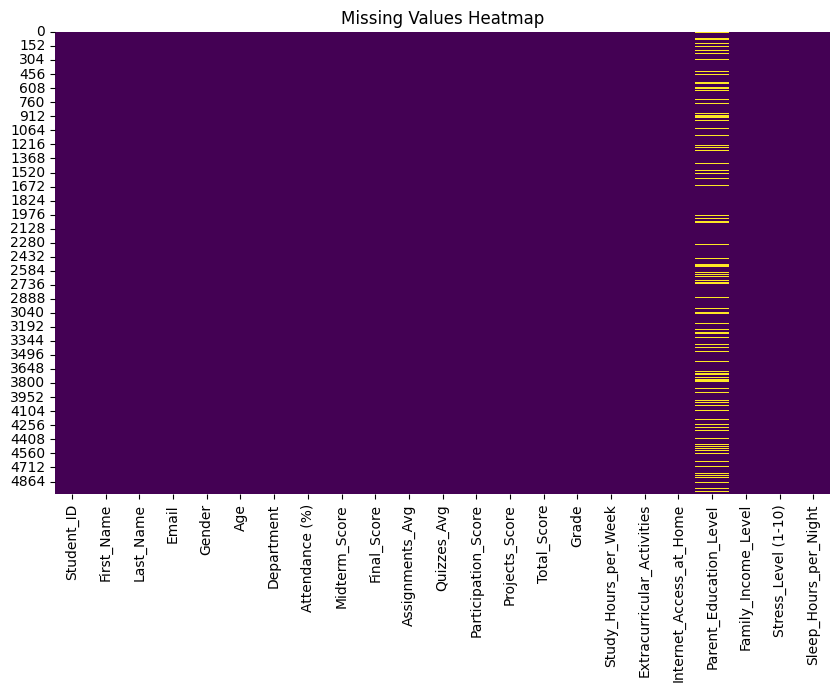

In [307]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## Handling Missing Values

Handling missing values required tailored strategies for both numerical and categorical columns. First, I separated the columns into two groups:

In [308]:
#Separate columns into numerical and categorical for tailored imputation strategies
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
numerical_cols,categorical_cols

(Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
        'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
        'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
        'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
       dtype='object'),
 Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender',
        'Department', 'Grade', 'Extracurricular_Activities',
        'Internet_Access_at_Home', 'Parent_Education_Level',
        'Family_Income_Level'],
       dtype='object'))

In [309]:
df[numerical_cols].median()

Age                      21.00000
Attendance (%)           75.67000
Midterm_Score            70.86000
Final_Score              69.48500
Assignments_Avg          75.09000
Quizzes_Avg              74.90500
Participation_Score      49.60000
Projects_Score           74.54000
Total_Score              71.69625
Study_Hours_per_Week     17.40000
Stress_Level (1-10)       6.00000
Sleep_Hours_per_Night     6.50000
dtype: float64

In [310]:
# fill the numerical cols with median for ( Assignments_Avg , Attendance   )
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[numerical_cols]

Age  Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0      22           97.36          40.61        59.61            73.69   
1      18           97.71          57.27        74.00            74.23   
2      24           99.52          41.84        63.85            85.85   
3      24           90.38          45.65        44.44            68.10   
4      23           59.41          53.13        61.77            67.66   
...   ...             ...            ...          ...              ...   
4995   19           96.09          45.86        45.63            74.13   
4996   19           96.30          78.67        47.42            57.89   
4997   24           89.94          50.84        65.83            84.69   
4998   23           99.09          55.44        57.45            78.78   
4999   21           90.33          93.29        88.42            87.06   

      Quizzes_Avg  Participation_Score  Projects_Score  Total_Score  \
0           53.17                 73.4           62.84      59.8865   
1           98.23                 88.0           98.23      81.9170   
2           50.00                  4.7           91.22      67.7170   
3           66.27                  4.2           55.48      51.6535   
4           83.98                 64.3           87.43      71.4030   
...           ...                  ...             ...          ...   
4995        81.53                  9.8           51.66      53.5470   
4996        85.96                 47.8           52.33      59.0240   
4997        82.27                  7.5           97.89      74.7560   
4998        55.96                 62.9           84.74      68.6585   
4999        65.22                 64.0           66.23      78.7485   

      Study_Hours_per_Week  Stress_Level (1-10)  Sleep_Hours_per_Night  
0                     10.3                    1                    5.9  
1                     27.1                    4                    4.3  
2                     12.4                    9                    6.1  
3                     25.5                    8                    4.9  
4                     13.3                    6                    4.5  
...                    ...                  ...                    ...  
4995                   7.8                   10                    4.5  
4996                  24.2                    4                    7.2  
4997                   7.6                    5                    6.6  
4998                  14.5                   10                    5.9  
4999                  29.9                    2                    5.3  

[5000 rows x 12 columns]

In [311]:
most_common_education = df.groupby('Family_Income_Level')['Parent_Education_Level'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
most_common_education


Family_Income_Level
High       Bachelor's
Low        Bachelor's
Medium    High School
Name: Parent_Education_Level, dtype: object

In [312]:
df.groupby('Family_Income_Level')['Parent_Education_Level'].value_counts(normalize=True)


Family_Income_Level  Parent_Education_Level
High                 Bachelor's                0.267649
                     PhD                       0.259891
                     Master's                  0.245151
                     High School               0.227308
Low                  Bachelor's                0.259895
                     Master's                  0.258402
                     PhD                       0.253174
                     High School               0.228529
Medium               High School               0.255382
                     Master's                  0.250928
                     PhD                       0.250928
                     Bachelor's                0.242762
Name: proportion, dtype: float64

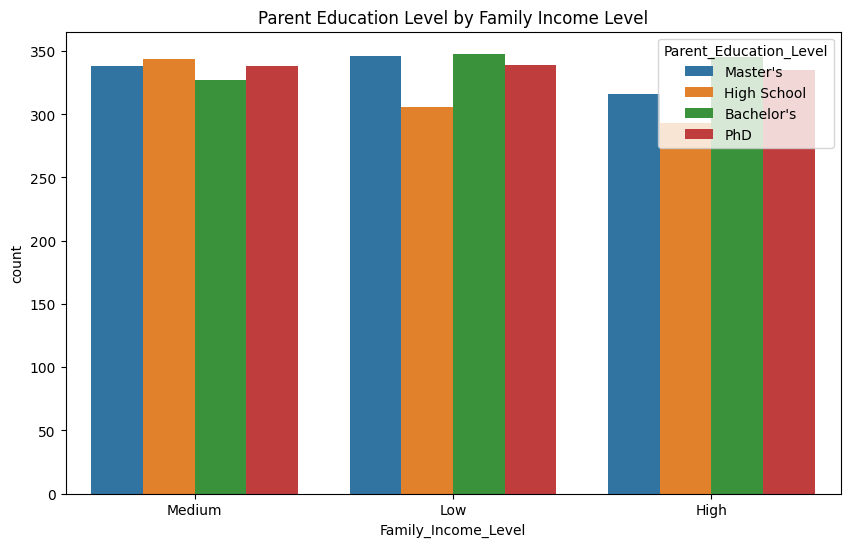

In [313]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Family_Income_Level', hue='Parent_Education_Level')
plt.title('Parent Education Level by Family Income Level')
plt.show()

In [314]:
education_counts = df.groupby(['Department'])['Parent_Education_Level'].value_counts().unstack()
education_counts

Parent_Education_Level  Bachelor's  High School  Master's  PhD
Department                                                    
Business                       266          246       265  243
CS                             256          224       247  244
Engineering                    261          232       263  262
Mathematics                    237          241       225  263

In [315]:
df['Parent_Education_Level'] = df.groupby(['Department'])['Parent_Education_Level'].transform(
    lambda x: x.fillna(x.mode()[0])
)
df['Parent_Education_Level']

0          Master's
1       High School
2       High School
3       High School
4          Master's
           ...     
4995       Master's
4996            PhD
4997     Bachelor's
4998            PhD
4999            PhD
Name: Parent_Education_Level, Length: 5000, dtype: object

check the data again

In [316]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

## Check for Duplicates:

In [317]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## Check Outliers

Using Z-scores (for detection): Outliers can be identified using Z-scores — data points beyond 3 standard deviations are typically considered outliers.

In [318]:

z_scores = stats.zscore(df[numerical_cols])
outliers = (z_scores > 3) | (z_scores < -3)
df_outliers = df[outliers.any(axis=1)]

print("Number of rows with outliers:", len(df_outliers))


Number of rows with outliers: 1


## ensure all good

In [319]:
print("Gender:", df['Gender'].unique())
print("Department:", df['Department'].unique())
print("Grade:", df['Grade'].unique())
print("Family_Income_Level:", df['Family_Income_Level'].unique())

Gender: ['male' 'female']
Department: ['Mathematics' 'Business' 'Engineering' 'CS']
Grade: ['F' 'B' 'D' 'C' 'A']
Family_Income_Level: ['Medium' 'Low' 'High']


## drop unnecessary for analysis and rename

In [320]:
df = df.drop(columns=['First_Name', 'Last_Name', 'Email','Student_ID'])
df.head()

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0    male   22  Mathematics           97.36          40.61        59.61   
1  female   18     Business           97.71          57.27        74.00   
2    male   24  Engineering           99.52          41.84        63.85   
3    male   24  Engineering           90.38          45.65        44.44   
4    male   23           CS           59.41          53.13        61.77   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            73.69        53.17                 73.4           62.84   
1            74.23        98.23                 88.0           98.23   
2            85.85        50.00                  4.7           91.22   
3            68.10        66.27                  4.2           55.48   
4            67.66        83.98                 64.3           87.43   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0      59.8865     F                  10.3                        Yes   
1      81.9170     B                  27.1                         No   
2      67.7170     D                  12.4                        Yes   
3      51.6535     F                  25.5                         No   
4      71.4030     C                  13.3                        Yes   

  Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                      No               Master's              Medium   
1                      No            High School                 Low   
2                      No            High School                 Low   
3                     Yes            High School                 Low   
4                      No               Master's              Medium   

   Stress_Level (1-10)  Sleep_Hours_per_Night  
0                    1                    5.9  
1                    4                    4.3  
2                    9                    6.1  
3                    8                    4.9  
4                    6                    4.5

In [321]:
df.rename(columns={'Stress_Level (1-10)': 'Stress_Level'}, inplace=True)
df

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0       male   22  Mathematics           97.36          40.61        59.61   
1     female   18     Business           97.71          57.27        74.00   
2       male   24  Engineering           99.52          41.84        63.85   
3       male   24  Engineering           90.38          45.65        44.44   
4       male   23           CS           59.41          53.13        61.77   
...      ...  ...          ...             ...            ...          ...   
4995    male   19           CS           96.09          45.86        45.63   
4996  female   19  Mathematics           96.30          78.67        47.42   
4997    male   24           CS           89.94          50.84        65.83   
4998  female   23  Engineering           99.09          55.44        57.45   
4999  female   21  Mathematics           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0               73.69        53.17                 73.4           62.84   
1               74.23        98.23                 88.0           98.23   
2               85.85        50.00                  4.7           91.22   
3               68.10        66.27                  4.2           55.48   
4               67.66        83.98                 64.3           87.43   
...               ...          ...                  ...             ...   
4995            74.13        81.53                  9.8           51.66   
4996            57.89        85.96                 47.8           52.33   
4997            84.69        82.27                  7.5           97.89   
4998            78.78        55.96                 62.9           84.74   
4999            87.06        65.22                 64.0           66.23   

      Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0         59.8865     F                  10.3                        Yes   
1         81.9170     B                  27.1                         No   
2         67.7170     D                  12.4                        Yes   
3         51.6535     F                  25.5                         No   
4         71.4030     C                  13.3                        Yes   
...           ...   ...                   ...                        ...   
4995      53.5470     F                   7.8                         No   
4996      59.0240     F                  24.2                         No   
4997      74.7560     C                   7.6                         No   
4998      68.6585     D                  14.5                        Yes   
4999      78.7485     C                  29.9                        Yes   

     Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                         No               Master's              Medium   
1                         No            High School                 Low   
2                         No            High School                 Low   
3                        Yes            High School                 Low   
4                         No               Master's              Medium   
...                      ...                    ...                 ...   
4995                      No               Master's              Medium   
4996                     Yes                    PhD              Medium   
4997                     Yes             Bachelor's                High   
4998                      No                    PhD              Medium   
4999                     Yes                    PhD                High   

      Stress_Level  Sleep_Hours_per_Night  
0                1                    5.9  
1                4                    4.3  
2                9                    6.1  
3                8                    4.9  
4                6                    4.5  
...            ...                    ...  
4995            10                    4.5  
49

In [322]:
#Separate columns into numerical and categorical for tailored imputation strategies
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
numerical_cols,categorical_cols

(Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
        'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
        'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level',
        'Sleep_Hours_per_Night'],
       dtype='object'),
 Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
        'Internet_Access_at_Home', 'Parent_Education_Level',
        'Family_Income_Level'],
       dtype='object'))

In [323]:
df.shape

(5000, 19)

# 3-Exploratory Data Analysis (EDA)

##  Number of Students by Department

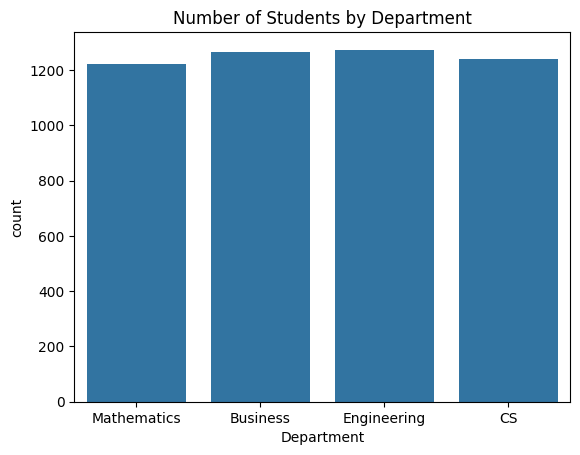

In [324]:
sns.countplot(x='Department', data=df)
plt.title('Number of Students by Department')
plt.show()

##  Most Common Gender by Department

In [325]:
# Get the most common gender count per department
most_common_gender = df.groupby('Department')['Gender'].agg(lambda x: x.mode()[0] )
most_common_gender

Department
Business       male
CS             male
Engineering    male
Mathematics    male
Name: Gender, dtype: object

In [326]:
cs_data = df[df['Department'] == 'CS']['Gender'].value_counts()
bu_data = df[df['Department'] == 'Business']['Gender'].value_counts()
en_data = df[df['Department'] == 'Engineering']['Gender'].value_counts()
ma_data = df[df['Department'] == 'Mathematics']['Gender'].value_counts()

cs_data,bu_data,en_data,ma_data

(Gender
 male      765
 female    474
 Name: count, dtype: int64,
 Gender
 male      799
 female    465
 Name: count, dtype: int64,
 Gender
 male      786
 female    488
 Name: count, dtype: int64,
 Gender
 male      753
 female    470
 Name: count, dtype: int64)

[Text(0, 0, '753'), Text(0, 0, '470')]

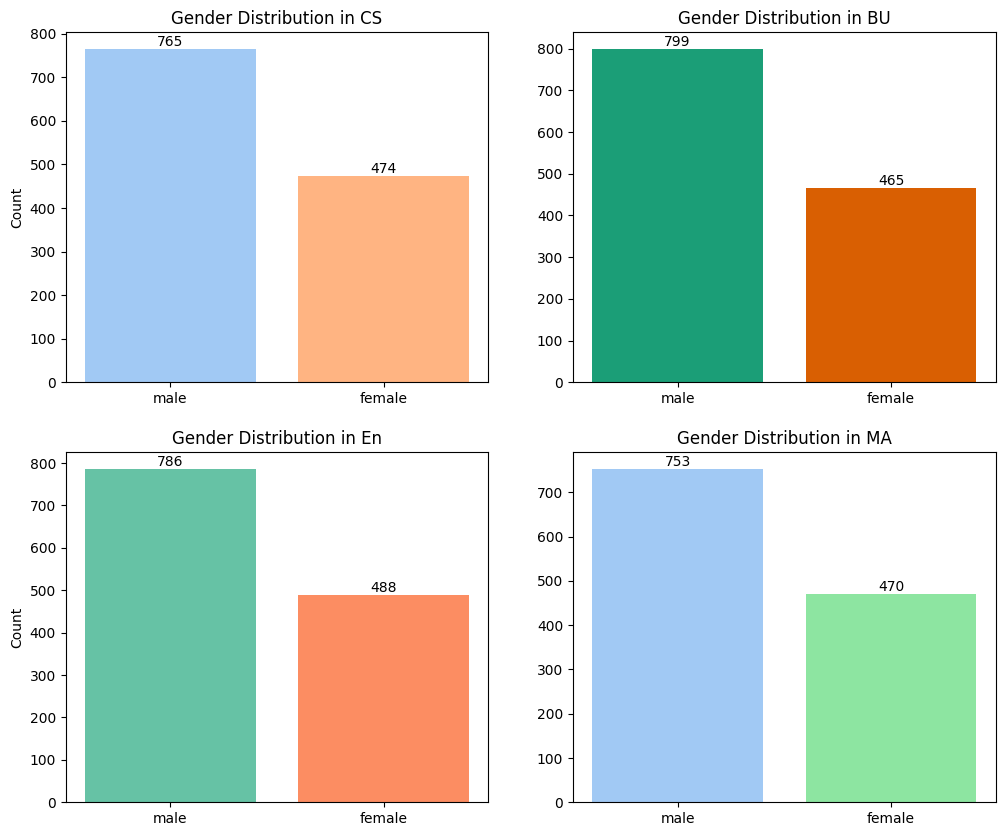

In [327]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.bar(cs_data.index, cs_data.values, color=sns.color_palette('pastel'))
plt.title('Gender Distribution in CS')
plt.ylabel('Count')
plt.bar_label(plt.gca().containers[0])

plt.subplot(2, 2, 2)
plt.bar(bu_data.index, bu_data.values, color=sns.color_palette('Dark2'))
plt.title('Gender Distribution in BU')
plt.bar_label(plt.gca().containers[0])

plt.subplot(2, 2, 3)
plt.bar(en_data.index, en_data.values, color=sns.color_palette('Set2'))
plt.title('Gender Distribution in En')
plt.ylabel('Count')
plt.bar_label(plt.gca().containers[0])

plt.subplot(2, 2, 4)
plt.bar(ma_data.index, ma_data.values, color=sns.color_palette('pastel6'))
plt.title('Gender Distribution in MA')
plt.bar_label(plt.gca().containers[0])


## Stress Level Distribution by Department

/tmp/ipython-input-3614530317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Stress_Level', data=df, palette='Set2')


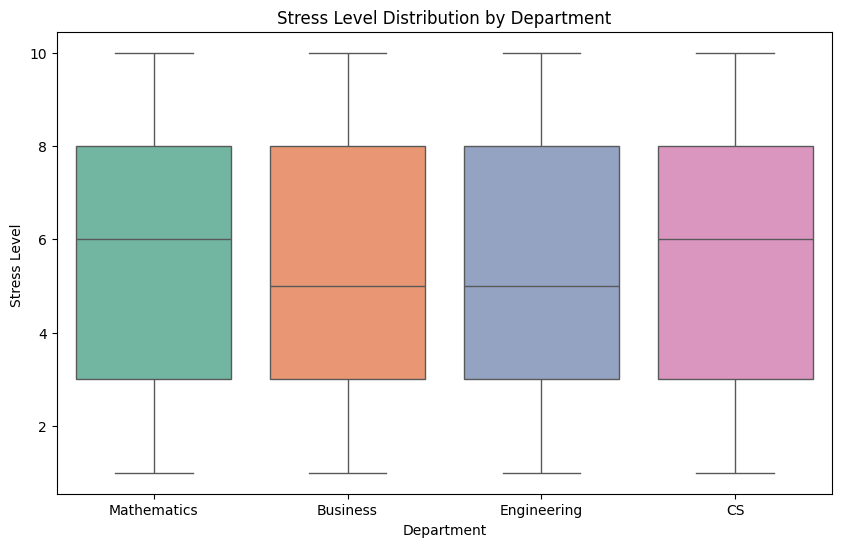

In [328]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Stress_Level', data=df, palette='Set2')
plt.title('Stress Level Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Stress Level ')
plt.show()


from this raw data we can see that the business and cs departments have higher avg levels of stress

## Age Distribution by Department

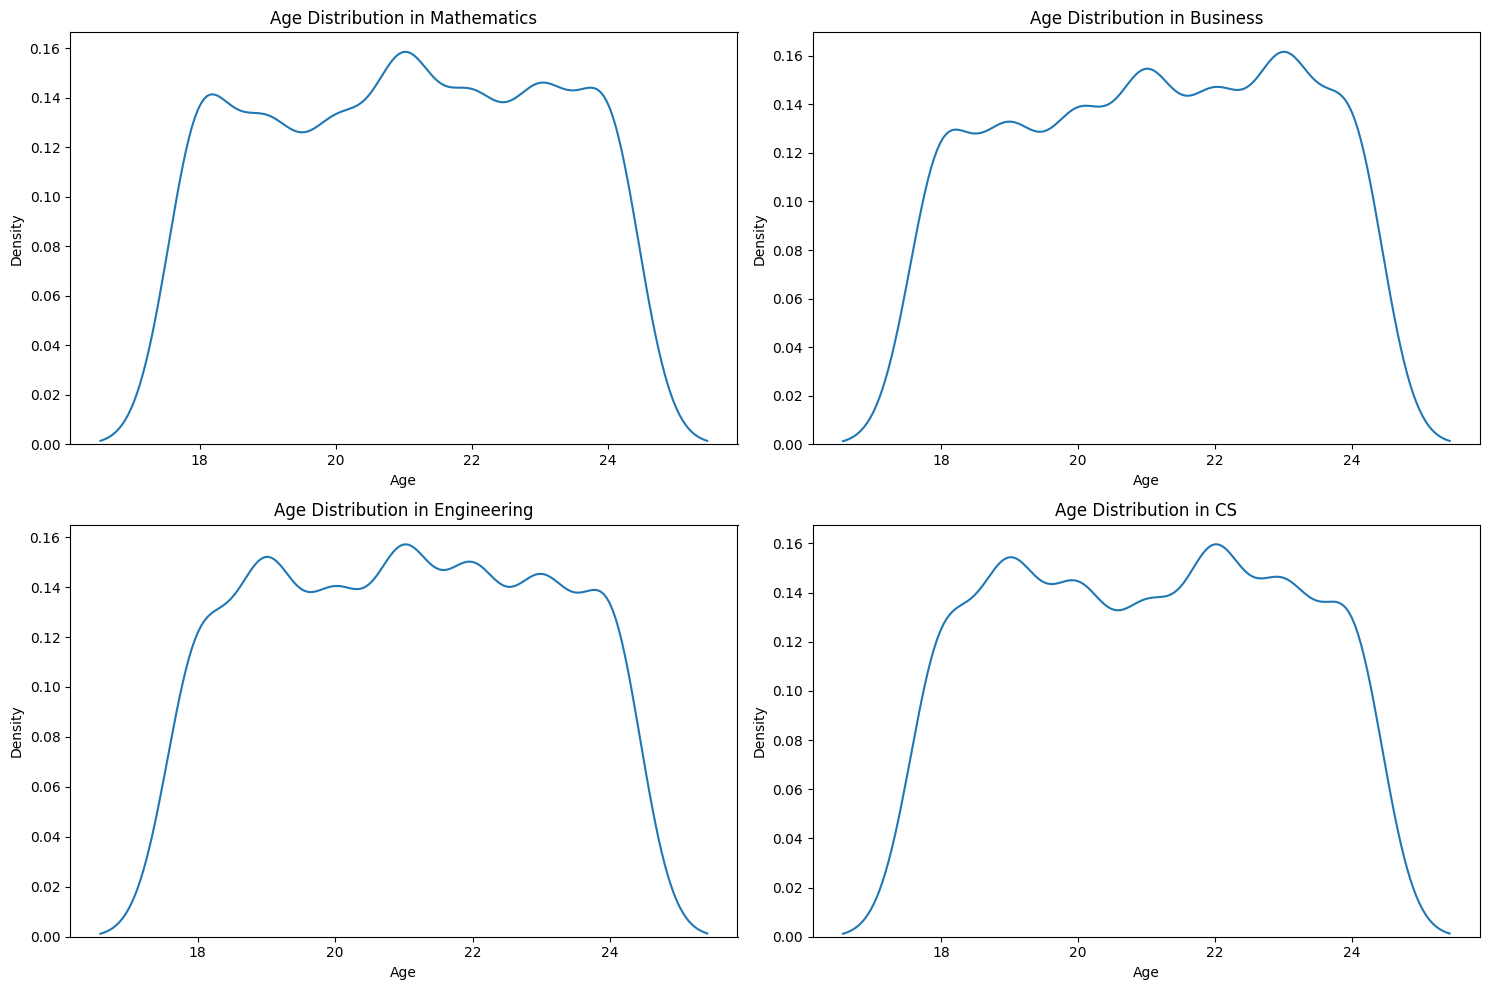

In [329]:
departments = df['Department'].unique()
num_departments = len(departments)

plt.figure(figsize=(15, 10))

for i, dept in enumerate(departments):
    plt.subplot(2, (num_departments + 1) // 2, i + 1)    # easier for not repeating the code
    sns.kdeplot(data=df[df['Department'] == dept], x='Age')
    plt.title(f'Age Distribution in {dept}')
    plt.xlabel('Age')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Most of the students are between the ages of 18 and 25.









## Midterm vs Final Scores Heatmap

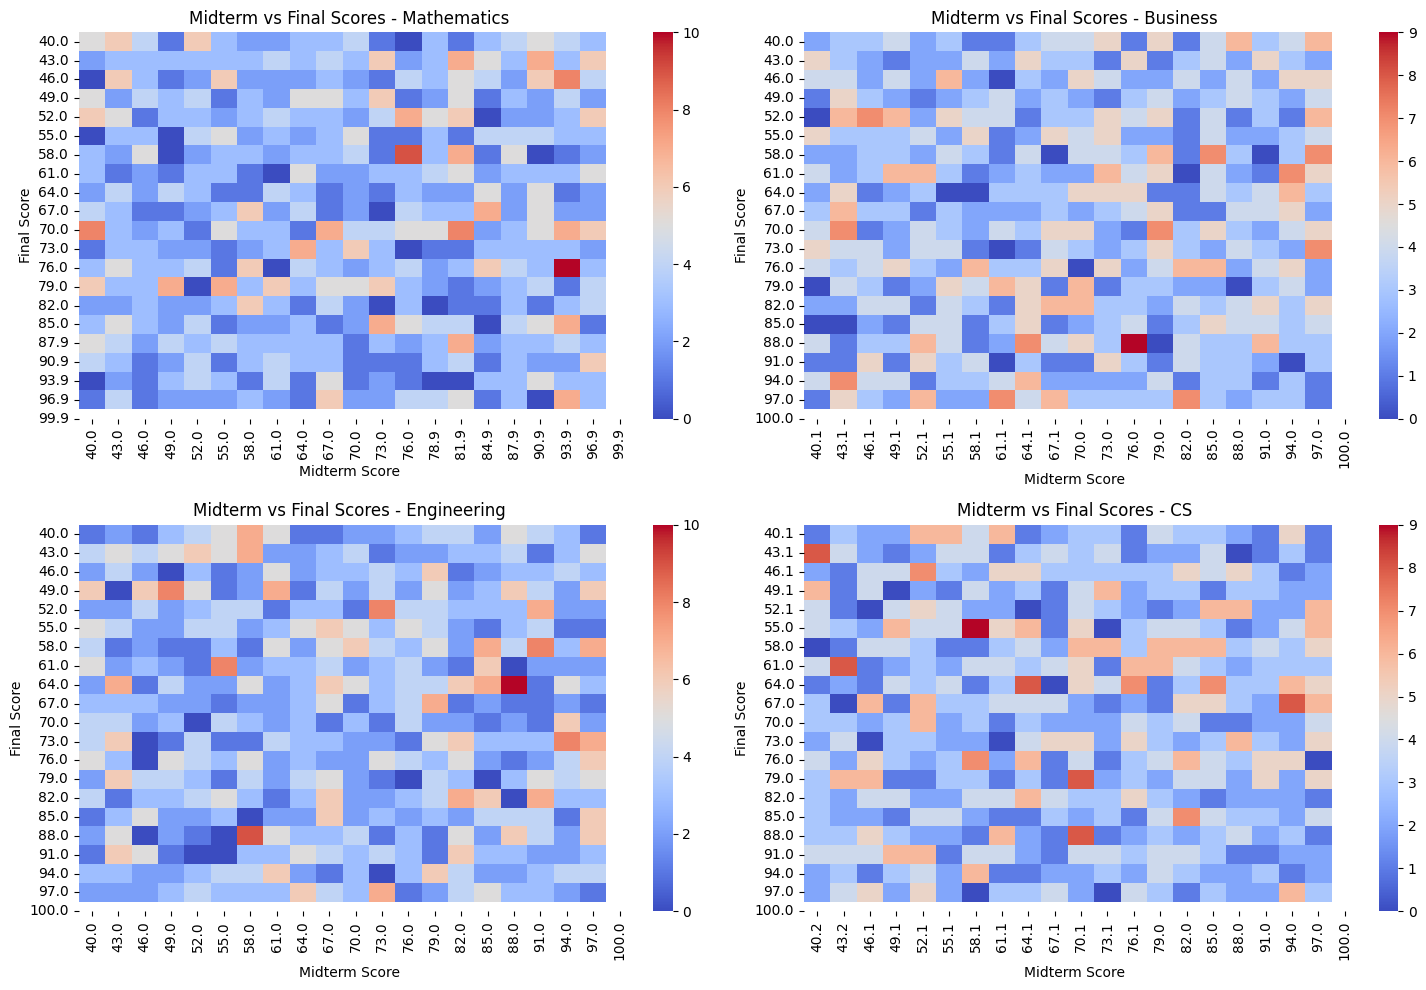

In [330]:

plt.figure(figsize=(15, 10))
for i, dept in enumerate(departments):
    plt.subplot(2, 2, i + 1)
    dept_data = df[df['Department'] == dept]

    heatmap_data, xedges, yedges = np.histogram2d(
        dept_data['Midterm_Score'], dept_data['Final_Score'], bins=20
    )

    sns.heatmap(heatmap_data.T,
                 xticklabels=np.round(xedges, 1),
                 yticklabels=np.round(yedges, 1),
                 cmap='coolwarm', cbar=True)

    plt.title(f'Midterm vs Final Scores - {dept}')
    plt.xlabel('Midterm Score')
    plt.ylabel('Final Score')

plt.tight_layout()
plt.show()


no strong relationship — some students improved, some did worse, and some stayed consistent.

## Study Hours and Stress Level Analysis

In [331]:
df_sample = df.sample(n=500, random_state=42)
df_sample

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
1501  female   23           CS           52.39          65.44        98.53   
2586  female   18  Engineering           81.43          73.14        47.10   
2653    male   21  Mathematics           74.08          84.71        90.41   
1055    male   22  Mathematics           92.95          77.36        72.29   
705     male   22           CS           54.41          80.19        52.79   
...      ...  ...          ...             ...            ...          ...   
3928    male   23  Engineering           78.39          71.01        66.41   
544     male   21           CS           94.91          79.33        49.63   
367   female   22           CS           69.56          87.94        67.60   
1612    male   21     Business           51.66          85.49        86.83   
3550    male   22  Mathematics           62.39          95.90        58.37   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
1501            66.19        69.06                  6.2           54.06   
2586            91.90        82.48                 10.7           97.77   
2653            52.12        68.44                 63.1           72.44   
1055            61.00        93.89                 85.8           67.97   
705             51.08        51.11                  2.6           66.99   
...               ...          ...                  ...             ...   
3928            73.86        51.39                 13.5           85.11   
544             74.66        93.88                 17.1           60.62   
367             96.89        63.32                  6.9           74.29   
1612            53.98        75.81                 43.5           51.24   
3550            60.73        67.39                 66.6           86.42   

      Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
1501      67.8110     D                  29.9                        Yes   
2586      74.6450     C                  24.2                        Yes   
2653      74.8580     C                  29.9                         No   
1055      72.8965     C                  24.3                        Yes   
705       58.2260     F                   8.3                        Yes   
...           ...   ...                   ...                        ...   
3928      69.6800     D                  29.6                        Yes   
544       63.9350     D                   6.1                         No   
367       73.5885     C                  24.5                        Yes   
1612      67.7560     D                  19.3                        Yes   
3550      74.0820     C                  14.4                         No   

     Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
1501                      No                    PhD                 Low   
2586                     Yes               Master's              Medium   
2653                      No            High School                 Low   
1055                      No                    PhD                High   
705                       No                    PhD                 Low   
...                      ...                    ...                 ...   
3928                     Yes               Master's                High   
544                      Yes             Bachelor's              Medium   
367                      Yes                    PhD              Medium   
1612                      No             Bachelor's              Medium   
3550                     Yes                    PhD                 Low   

      Stress_Level  Sleep_Hours_per_Night  
1501             5                    5.6  
2586             2                    8.2  
2653             3                    5.2  
1055             8                    6.7  
705              2                    4.2  
...            ...                    ...  
3928             7                    8.0  
54

Sample 500 students for analysis

Define bins and labels for study hours

In [332]:
bins = [5, 10, 15, 20, 25, 30]
labels = ['5-10', '10-15', '15-20', '20-25', '25-30']

# Bin the study hours
df_sample['Study_Hours_Bins'] = pd.cut(df_sample['Study_Hours_per_Week'], bins=bins, labels=labels, right=False)

# Group by bins and calculate mean stress level, total score, and count of students
binned_data = df_sample.groupby('Study_Hours_Bins', observed=False).agg({
    'Study_Hours_per_Week': 'count',
    'Stress_Level': 'mean',
    'Total_Score': 'mean',
}).rename(columns={'Study_Hours_per_Week': 'Number_of_Students'}).reset_index()

# Display the table
print(binned_data)


  Study_Hours_Bins  Number_of_Students  Stress_Level  Total_Score
0             5-10                 116      5.051724    71.525853
1            10-15                 106      5.188679    72.385708
2            15-20                  88      5.170455    72.476761
3            20-25                  91      5.252747    72.597066
4            25-30                  98      5.734694    71.556658


no observable difference

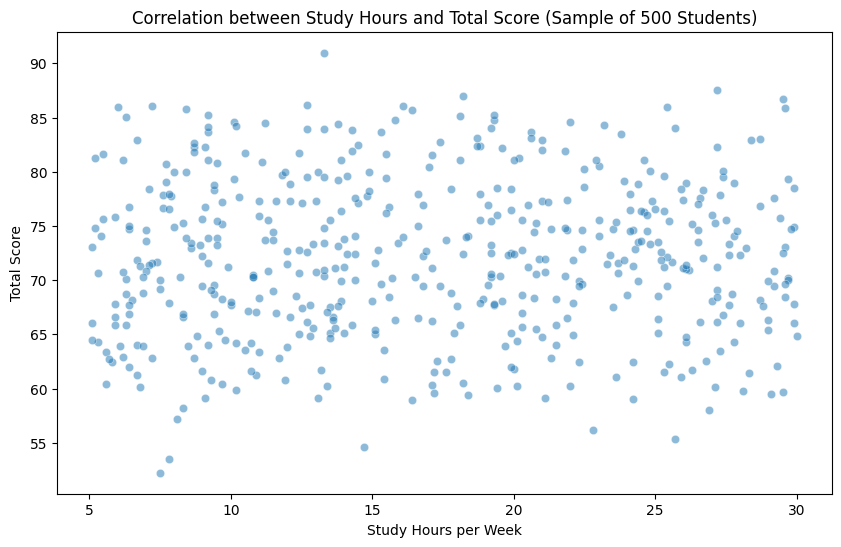

In [333]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', data=df_sample, alpha=0.5)
plt.title('Correlation between Study Hours and Total Score (Sample of 500 Students)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.show()


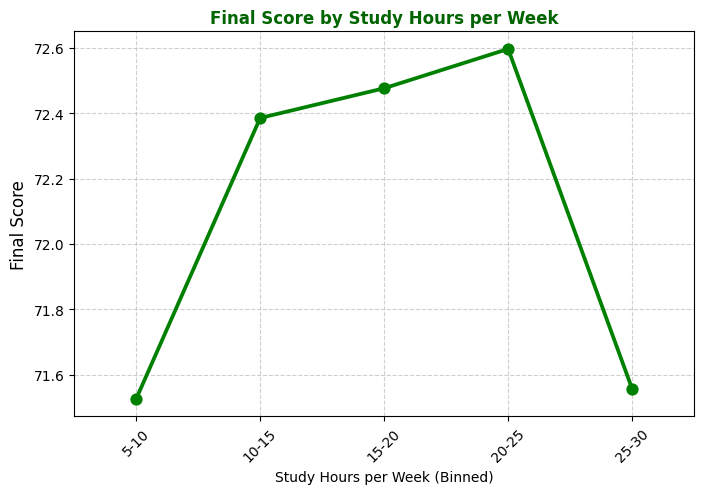

In [334]:
bins = [5, 10, 15, 20, 25, 30]
labels = ['5-10', '10-15', '15-20', '20-25', '25-30']

# Bin the study hours
df_sample['Study_Hours_Bins'] = pd.cut(df_sample['Study_Hours_per_Week'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(
    x='Study_Hours_Bins',
    y='Total_Score',
    data=df_sample,
    errorbar=None,
    color='green',
    markers='o'
)
plt.title('Final Score by Study Hours per Week', fontsize=12, fontweight='bold', color='darkgreen')
plt.xlabel('Study Hours per Week (Binned)', fontsize=10)
plt.ylabel('Final Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


There is Negative correlation as The Final Score seems to decrease as Study Hours per Week increase, which is unexpected — usually, we assume more study time leads to better grades.


## Academic Performance Analysis

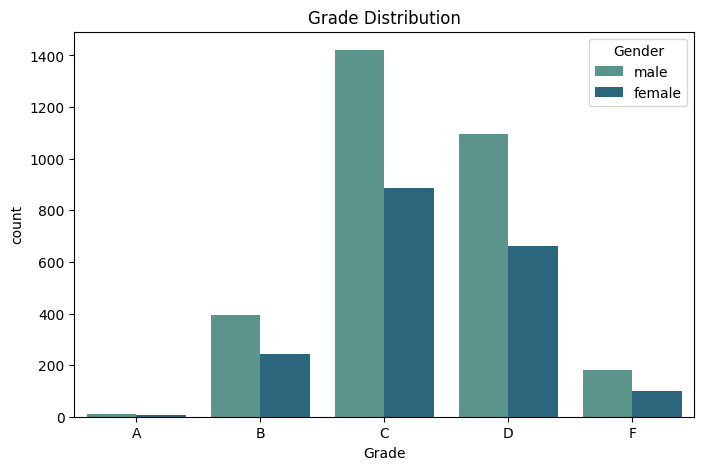

In [335]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Grade'], order=['A', 'B', 'C', 'D', 'F'],hue=df['Gender'], palette='crest')
plt.title("Grade Distribution")
plt.show()

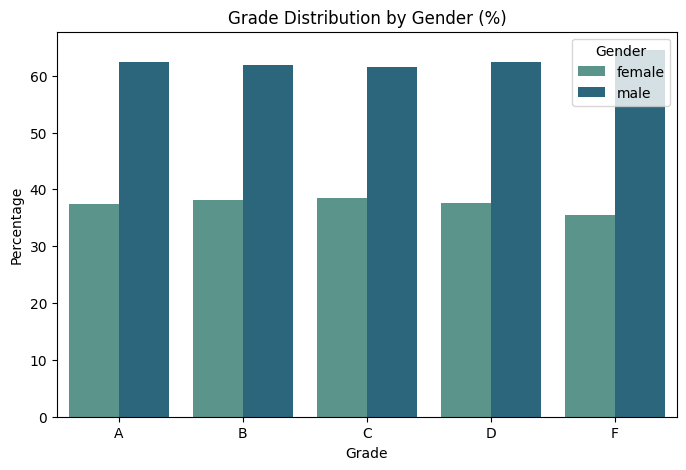

In [336]:
grade_counts = df.groupby(['Grade', 'Gender']).size().reset_index(name='Count')
grade_totals = grade_counts.groupby('Grade')['Count'].transform('sum')
grade_counts['Percentage'] = (grade_counts['Count'] / grade_totals) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Grade', y='Percentage', hue='Gender', data=grade_counts, palette='crest', order=['A', 'B', 'C', 'D', 'F'])
plt.title("Grade Distribution by Gender (%)")
plt.ylabel('Percentage')
plt.show()

## Feature Correlation Heatmap

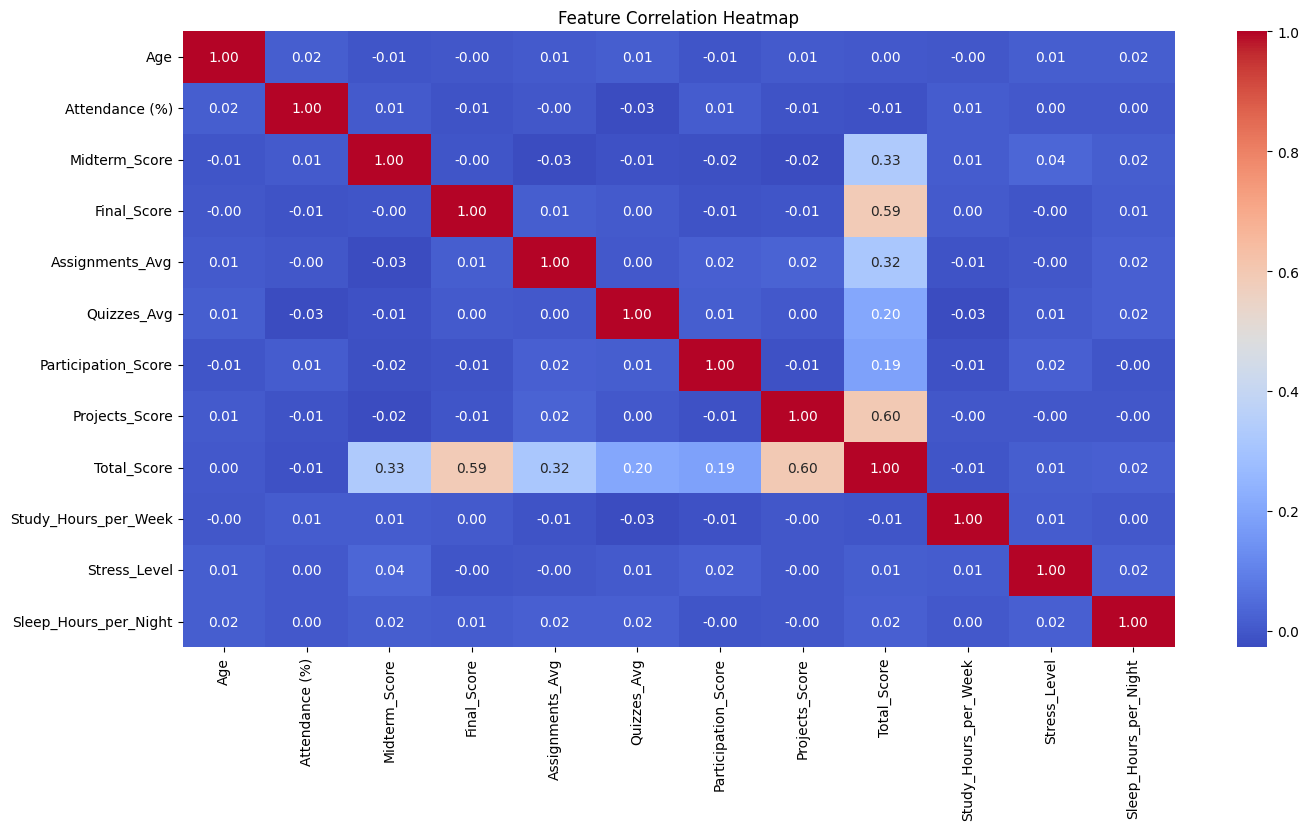

In [337]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Most relationships appear weakly correlated, suggesting no strong linear relationships among features.

## Attendance and Total Score

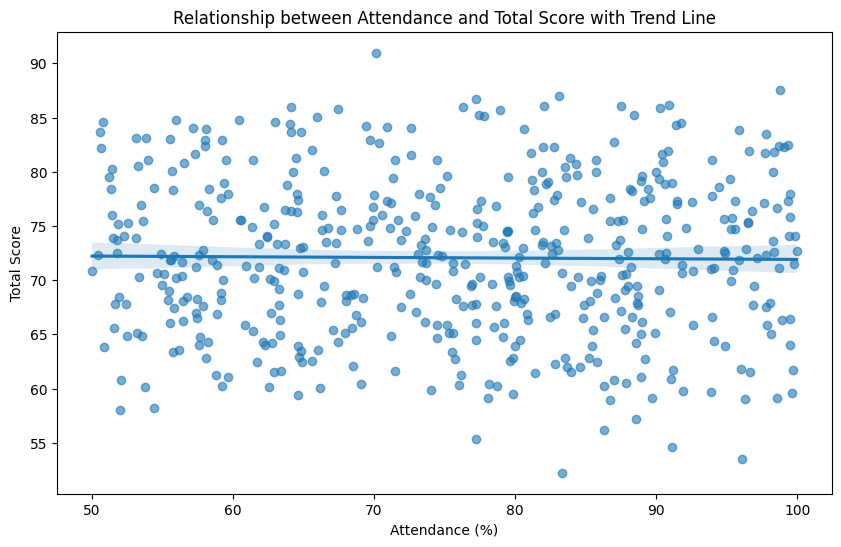

In [338]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance (%)', y='Total_Score', data=df_sample, scatter_kws={'alpha':0.6})
plt.title('Relationship between Attendance and Total Score with Trend Line')
plt.xlabel('Attendance (%)')
plt.ylabel('Total Score')
plt.show()


## Parent Education Level and Student Performance

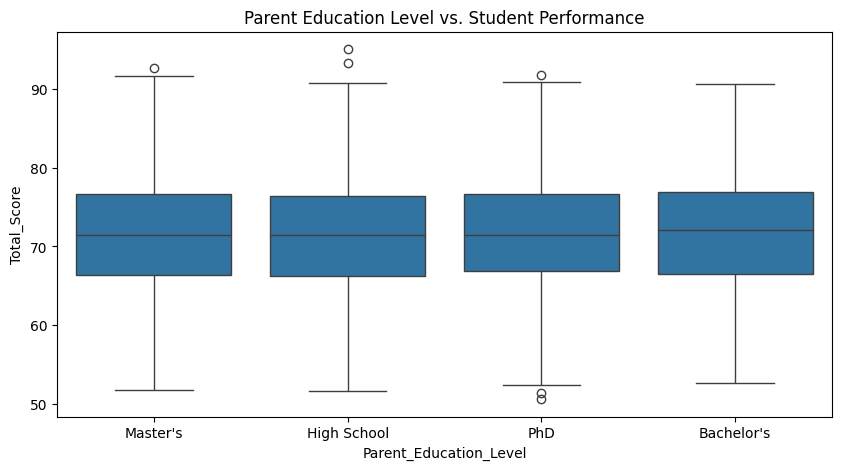

In [339]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Parent_Education_Level'], y=df['Total_Score'])
plt.title("Parent Education Level vs. Student Performance")
plt.show()

## Extracurricular Activities Analysis and Impact on Total Score

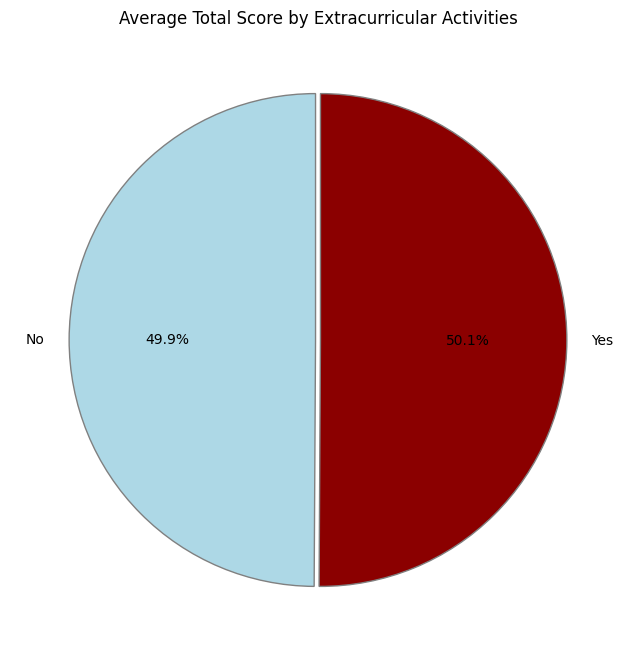

In [340]:
extracurricular_avg = df_sample.groupby('Extracurricular_Activities')['Total_Score'].mean().reset_index()

colors = ["lightblue", "darkred"]
explode = [0.01] * len(extracurricular_avg)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    extracurricular_avg['Total_Score'],
    labels=extracurricular_avg['Extracurricular_Activities'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'grey'},
    explode=explode
)
plt.title('Average Total Score by Extracurricular Activities')
plt.show()


The split is almost equal, with a slight majority participating.

##  Extracurricular Activities Analysis and Impact on Stress Level

In [341]:
# Group by extracurricular activities and calculate the average stress level
extracurricular_avg = df.groupby('Extracurricular_Activities')['Stress_Level'].mean().reset_index()

# Rename the column for consistency
extracurricular_avg.rename(columns={'Stress_Level': 'Stress_Level'}, inplace=True)

print(extracurricular_avg.head())


  Extracurricular_Activities  Stress_Level
0                         No      5.542203
1                        Yes      5.472532


Stress levels are nearly identical

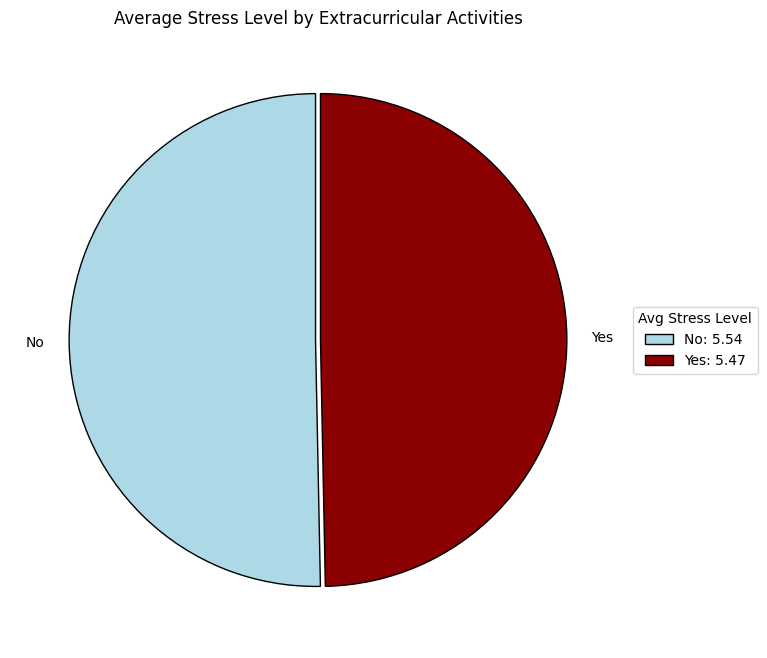

In [342]:
plt.figure(figsize=(8, 8))
plt.pie(
    extracurricular_avg['Stress_Level'],
    labels=extracurricular_avg['Extracurricular_Activities'],
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    explode=explode
)

# Add average stress levels to the legend
plt.legend(
    [f"{activity}: {stress:.2f}" for activity, stress in zip(
        extracurricular_avg['Extracurricular_Activities'],
        extracurricular_avg['Stress_Level']
    )],
    title="Avg Stress Level",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Average Stress Level by Extracurricular Activities')
plt.show()


The split is almost equal, suggesting extracurricular activities have a minimal impact on reducing stress levels.

## Stress Levels and Sleep Patterns Across Ages

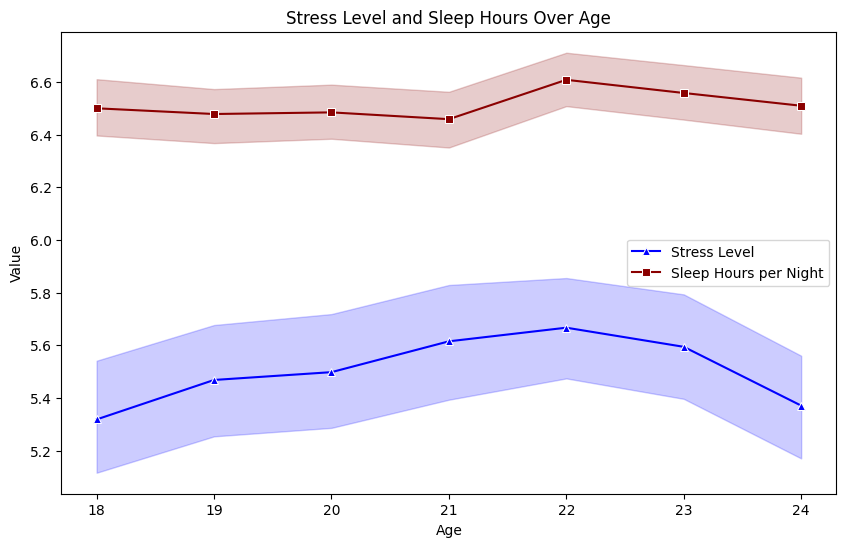

In [343]:

# Plot stress levels and sleep hours against age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Stress_Level', data=df, label="Stress Level", marker='^', color='b')
sns.lineplot(x='Age', y='Sleep_Hours_per_Night', data=df, label="Sleep Hours per Night", marker='s', color='darkred')

plt.xlabel("Age")
plt.ylabel("Value")
plt.title("Stress Level and Sleep Hours Over Age")
plt.legend()
plt.show()


higher stress might affect sleep negatively

## Distributions of Numerical Features

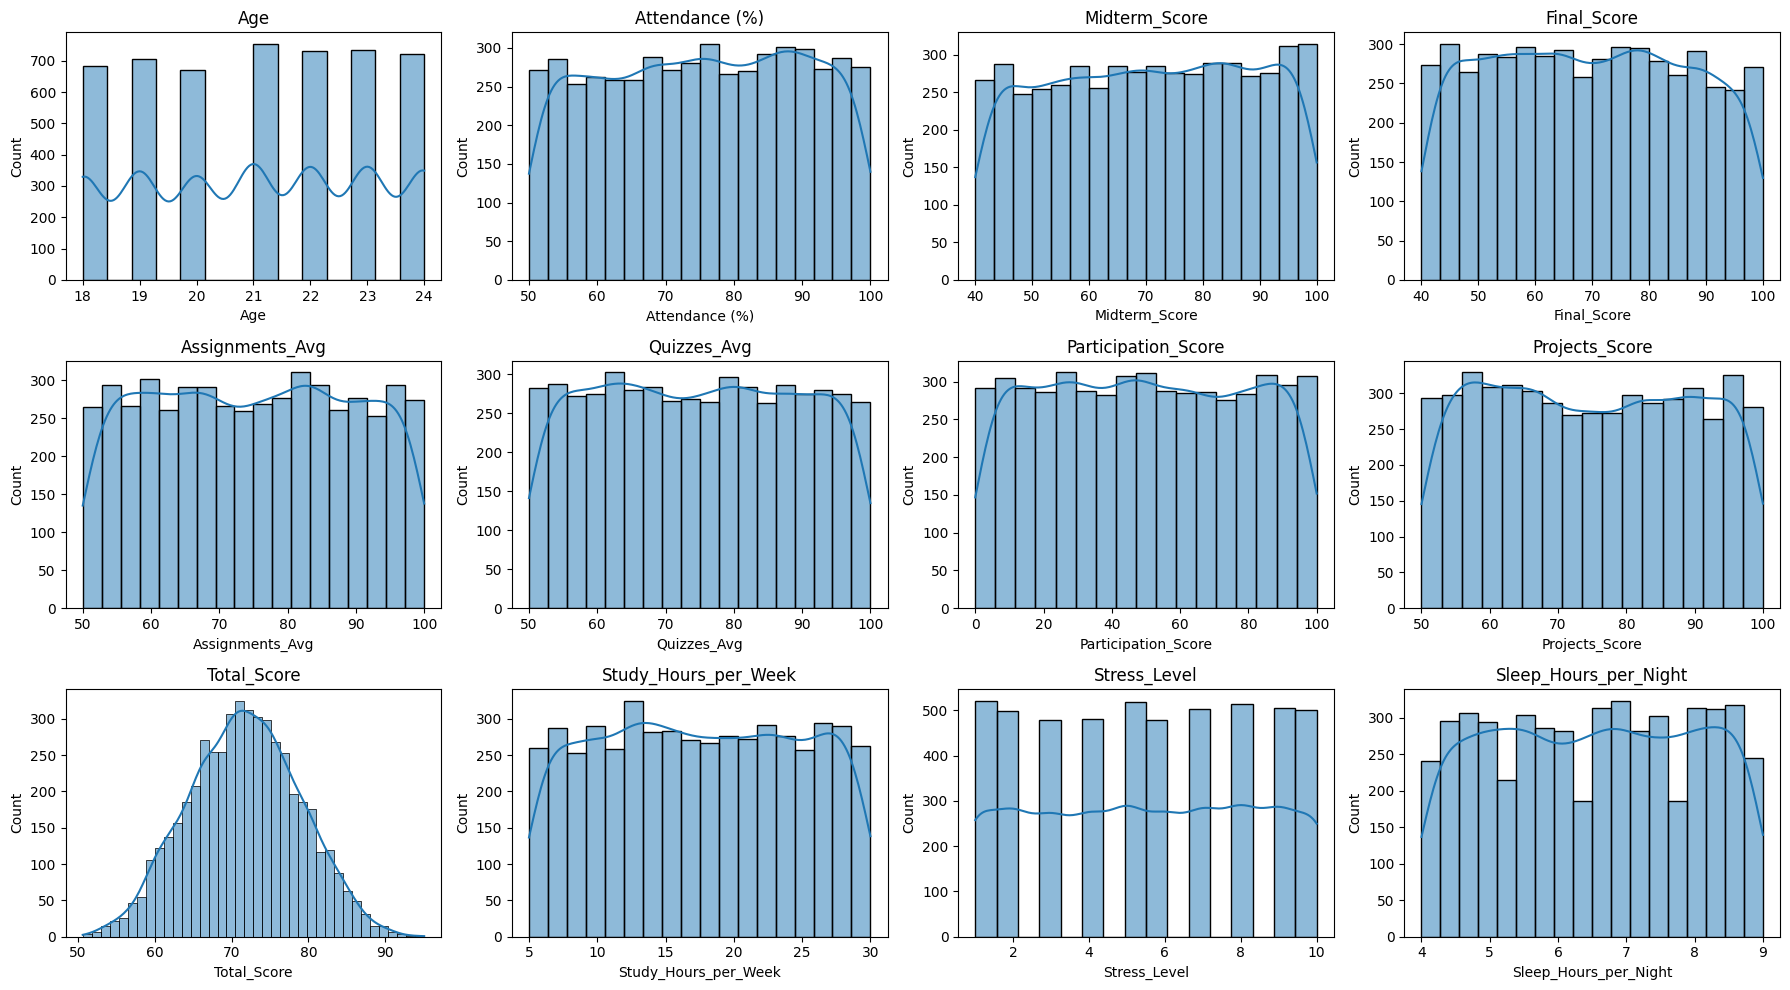

In [344]:
num_plots = len(numerical_cols)
rows = math.ceil(num_plots / 4)  # Adjust rows dynamically for 4 columns

plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 4, i)  # Adjust grid size based on number of plots
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

The dataset provides insights into various aspects of student performance, including scores, study habits, and stress levels. The age distribution appears relatively uniform, with certain peaks indicating more students in specific age groups. Attendance (%) shows a concentration around 75%, suggesting that many students maintain moderate attendance.

Exam scores, including Midterm Score and Final Score, are evenly distributed without significant clustering, while Assignments Average has a noticeable peak around 70-75, indicating that many students score in this range. Quizzes Average and Projects Score exhibit more uniform distributions, suggesting varied performance levels. The Participation Score is evenly spread, reflecting differences in engagement among students.

Regarding study habits, most students dedicate 5-25 hours per week to studying, while sleep hours per night are generally between 5-8 hours, which is typical for students. Stress levels appear uniformly distributed, implying diverse experiences with academic pressure.

Overall,common trends exist in attendance, assignment performance, and study hours.



## Internet Access and Academic Performance

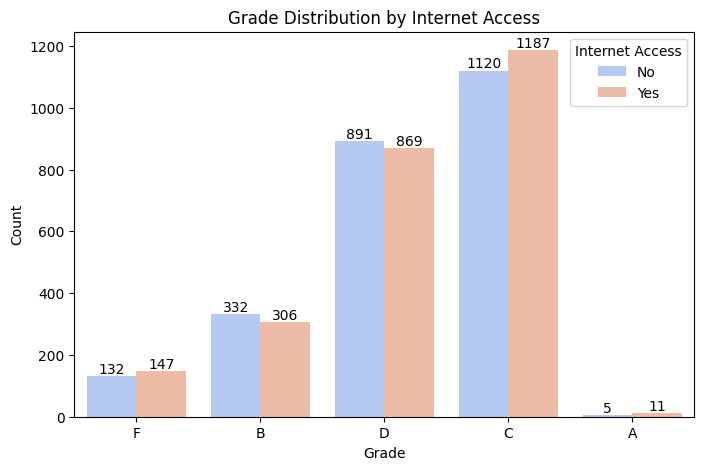

In [345]:
internet_performance = df.groupby('Internet_Access_at_Home')['Grade']
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', hue='Internet_Access_at_Home', data=df, palette='coolwarm')
plt.title('Grade Distribution by Internet Access')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Internet Access')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()



Internet access might support better academic performance, but it’s not the sole factor

## Academic Performance by Family Income

In [346]:
income_counts = df['Family_Income_Level'].value_counts()
print(income_counts)

Family_Income_Level
Low       1687
Medium    1674
High      1639
Name: count, dtype: int64


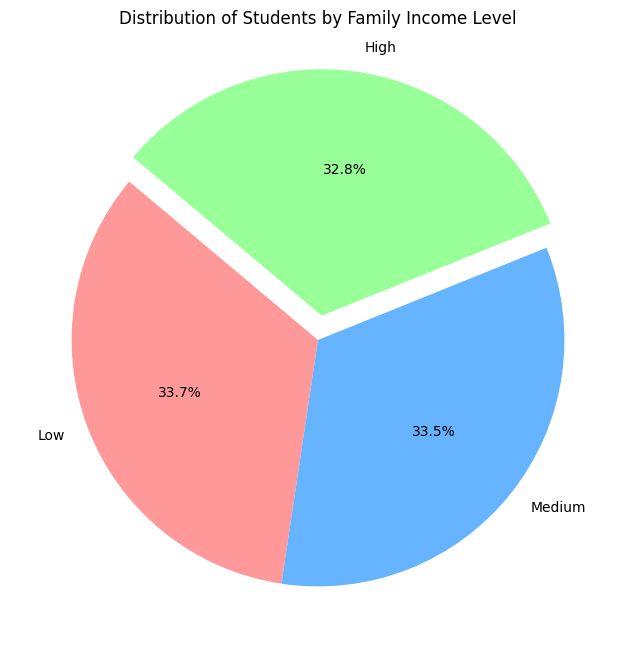

In [347]:
income_levels = ['Low', 'Medium', 'High']
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.0, 0.0,0.1)
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_levels, autopct='%1.1f%%', colors=colors, startangle=140 ,explode=explode)
plt.title('Distribution of Students by Family Income Level')
plt.show()


this data seems to have more data of low and medium levels

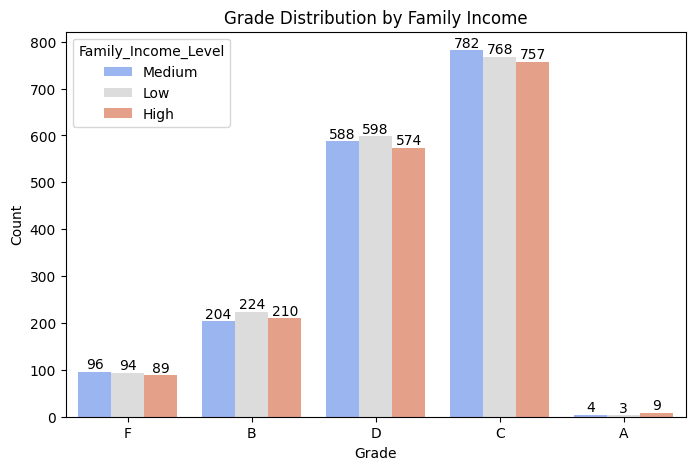

In [348]:
internet_performance = df.groupby('Family_Income_Level')['Grade']
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', hue='Family_Income_Level', data=df, palette='coolwarm')
plt.title('Grade Distribution by Family Income')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Family_Income_Level')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()



might be a relation

In [349]:
grade_counts = df.groupby(['Family_Income_Level', 'Grade']).size().unstack(fill_value=0)

grade_percentages = grade_counts.div(income_counts, axis=0) * 100

print("Percentage of grades within each income level:")
print(grade_percentages)



Percentage of grades within each income level:
Grade                       A          B          C          D         F
Family_Income_Level                                                     
High                 0.549115  12.812691  46.186699  35.021354  5.430140
Low                  0.177830  13.278008  45.524600  35.447540  5.572021
Medium               0.238949  12.186380  46.714456  35.125448  5.734767


A grades are slightly more common among Low-income students.  
F grades are highest in the High-income group — could suggest certain high-income students may struggle despite having more resources.  
Medium-income students seem to have the most balanced distribution across grades.

## Impact of Parent Education Level on Student Performance

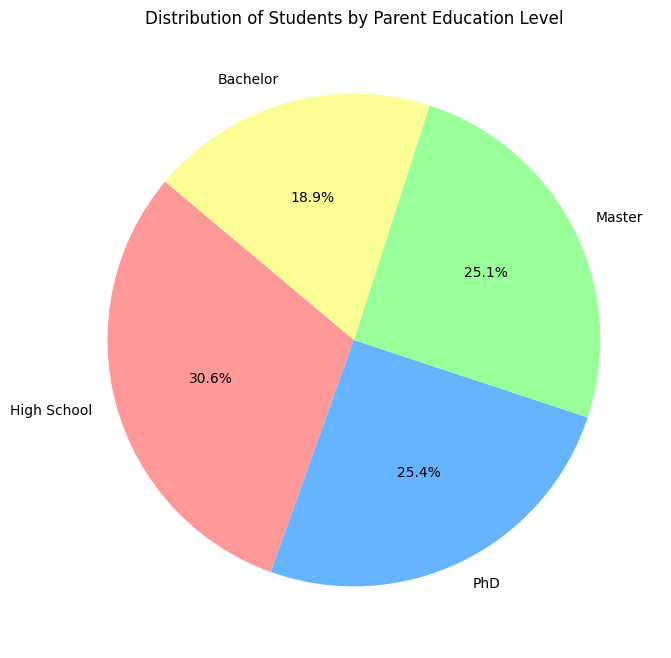

In [350]:
ed_counts = df['Parent_Education_Level'].value_counts()

ed_levels = ['High School', 'PhD', 'Master' , 'Bachelor']
colors = ['#ff9999','#66b3ff','#99ff99',"#FDFD96"]
explode = (0.0, 0.0,0.0,0.0)
plt.figure(figsize=(8, 8))
plt.pie(ed_counts, labels=ed_levels, autopct='%1.1f%%', colors=colors, startangle=140 ,explode=explode)
plt.title('Distribution of Students by Parent Education Level')
plt.show()


the data seems to have larger numbers of high school parent level education

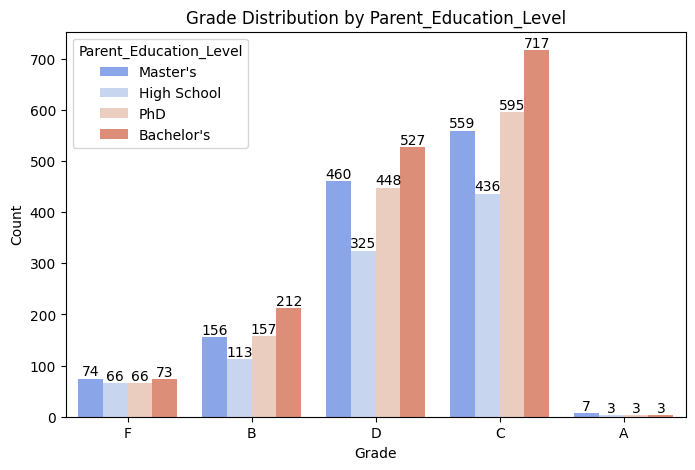

In [351]:
p_performance = df.groupby('Parent_Education_Level')['Grade']
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', hue='Parent_Education_Level', data=df, palette='coolwarm')
plt.title('Grade Distribution by Parent_Education_Level')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Parent_Education_Level')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()



. It seems students with High School and PhD-educated parents have more counts across all grades, while those with Master's degrees are fewer but we can calculate by percentage

In [352]:
grade_counts = df.groupby(['Parent_Education_Level', 'Grade']).size().unstack(fill_value=0)

grade_percentages = grade_counts.div(ed_counts, axis=0) * 100

print("Percentage of grades within each education level:")
print(grade_percentages)



Percentage of grades within each education level:
Grade                          A          B          C          D         F
Parent_Education_Level                                                     
Bachelor's              0.195822  13.838120  46.801567  34.399478  4.765013
High School             0.318134  11.983033  46.235419  34.464475  6.998940
Master's                0.557325  12.420382  44.506369  36.624204  5.891720
PhD                     0.236407  12.371946  46.887313  35.303388  5.200946


each education level seem fairly balanced

Overall Grade distributions show minimal differences between genders, while internet access and family income subtly impact academic outcomes, suggesting that resource availability plays a role but isn’t the sole determinant of success. Stress and sleep patterns highlight an inverse relationship — higher stress often correlates with fewer sleep hours — raising the question of whether stress negatively affects overall performance. The data on extracurricular activities suggests a nearly equal split in participation, with those involved experiencing slightly lower average stress, hinting that these activities may offer a form of stress relief. When examining parent education levels, most parents have either a High School or PhD education, yet student grades appear fairly balanced across all levels, pointing to the need to explore how education level intersects with other factors like income or internet access. Interestingly, while Low and Medium-income families are more represented, High-income students show the highest percentage of F grades — a surprising find that suggests resources alone do not guarantee academic success. Lastly, visualizing numerical features through histograms reveals smooth distributions . This analysis opens the door to deeper investigations, encouraging us to look beyond single variables and explore how multiple factors interact to shape student outcomes.

# 4-Feature Engineering

In [353]:
# Copy the original DataFrame to avoid modifying the raw data
df_fe = df.copy()

### 1. Score Consistency (Standard Deviation of scores)


In [354]:
df_fe['Score_Consistency'] = df_fe[['Midterm_Score', 'Final_Score', 'Assignments_Avg',
                                     'Quizzes_Avg', 'Participation_Score', 'Projects_Score']].std(axis=1)
df_fe

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0       male   22  Mathematics           97.36          40.61        59.61   
1     female   18     Business           97.71          57.27        74.00   
2       male   24  Engineering           99.52          41.84        63.85   
3       male   24  Engineering           90.38          45.65        44.44   
4       male   23           CS           59.41          53.13        61.77   
...      ...  ...          ...             ...            ...          ...   
4995    male   19           CS           96.09          45.86        45.63   
4996  female   19  Mathematics           96.30          78.67        47.42   
4997    male   24           CS           89.94          50.84        65.83   
4998  female   23  Engineering           99.09          55.44        57.45   
4999  female   21  Mathematics           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0               73.69        53.17                 73.4           62.84   
1               74.23        98.23                 88.0           98.23   
2               85.85        50.00                  4.7           91.22   
3               68.10        66.27                  4.2           55.48   
4               67.66        83.98                 64.3           87.43   
...               ...          ...                  ...             ...   
4995            74.13        81.53                  9.8           51.66   
4996            57.89        85.96                 47.8           52.33   
4997            84.69        82.27                  7.5           97.89   
4998            78.78        55.96                 62.9           84.74   
4999            87.06        65.22                 64.0           66.23   

      Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0         59.8865     F                  10.3                        Yes   
1         81.9170     B                  27.1                         No   
2         67.7170     D                  12.4                        Yes   
3         51.6535     F                  25.5                         No   
4         71.4030     C                  13.3                        Yes   
...           ...   ...                   ...                        ...   
4995      53.5470     F                   7.8                         No   
4996      59.0240     F                  24.2                         No   
4997      74.7560     C                   7.6                         No   
4998      68.6585     D                  14.5                        Yes   
4999      78.7485     C                  29.9                        Yes   

     Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                         No               Master's              Medium   
1                         No            High School                 Low   
2                         No            High School                 Low   
3                        Yes            High School                 Low   
4                         No               Master's              Medium   
...                      ...                    ...                 ...   
4995                      No               Master's              Medium   
4996                     Yes                    PhD              Medium   
4997                     Yes             Bachelor's                High   
4998                      No                    PhD              Medium   
4999                     Yes                    PhD                High   

      Stress_Level  Sleep_Hours_per_Night  Score_Consistency  
0                1                    5.9          12.617272  
1                4                    4.3          16.112591  
2                9                    6.1          31.814882  
3                8                    4.9          23.357680  
4                6                    4

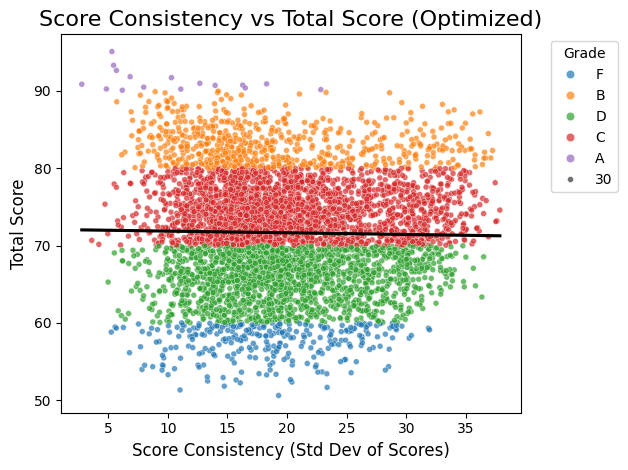

In [355]:
sns.scatterplot(
    x='Score_Consistency', y='Total_Score', data=df_fe,
    hue='Grade', palette='tab10', alpha=0.7, size=30
)

# Add regression line (trend line)
sns.regplot(
    x='Score_Consistency', y='Total_Score', data=df_fe,
    scatter=False, color='black', ci=None
)

plt.title('Score Consistency vs Total Score (Optimized)', fontsize=16)
plt.xlabel('Score Consistency (Std Dev of Scores)', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Some students with highly fluctuating scores still achieved high total scores.  
Others with steady performance didn’t necessarily score high overall.


/tmp/ipython-input-3395491460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Score_Consistency', data=df_fe, palette='Set2')


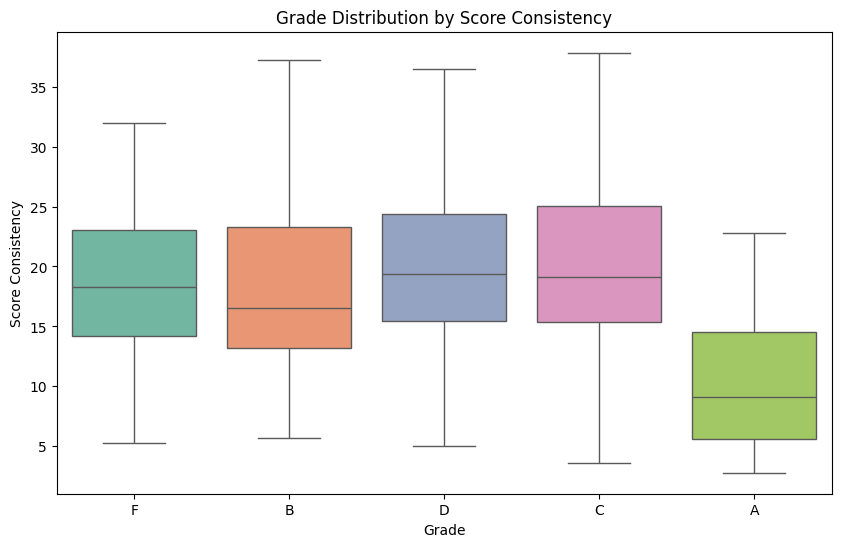

In [356]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Score_Consistency', data=df_fe, palette='Set2')
plt.title('Grade Distribution by Score Consistency')
plt.xlabel('Grade')
plt.ylabel('Score Consistency')
plt.show()

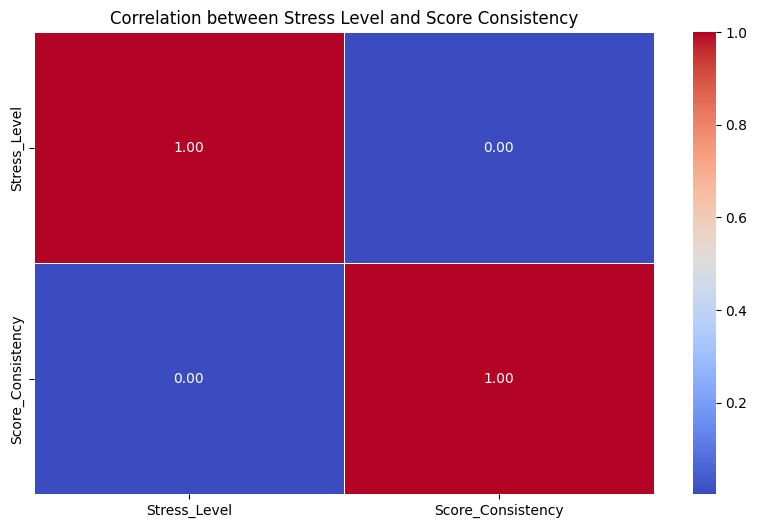

In [357]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_fe[['Stress_Level', 'Score_Consistency']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Stress Level and Score Consistency')
plt.show()

students’ stress levels don’t seem to impact how stable their scores are.

### 2. Participation-Project Ratio

To avoid division by zero errors, let's handle Projects_Score == 0 by replacing with a small value


In [358]:
df_fe['Projects_Score'] = df_fe['Projects_Score'].replace(0, 0.01)  # Prevent division by zero
df_fe['Participation_Project_Ratio'] = df_fe['Participation_Score'] / df_fe['Projects_Score']
df_fe

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0       male   22  Mathematics           97.36          40.61        59.61   
1     female   18     Business           97.71          57.27        74.00   
2       male   24  Engineering           99.52          41.84        63.85   
3       male   24  Engineering           90.38          45.65        44.44   
4       male   23           CS           59.41          53.13        61.77   
...      ...  ...          ...             ...            ...          ...   
4995    male   19           CS           96.09          45.86        45.63   
4996  female   19  Mathematics           96.30          78.67        47.42   
4997    male   24           CS           89.94          50.84        65.83   
4998  female   23  Engineering           99.09          55.44        57.45   
4999  female   21  Mathematics           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  ...  \
0               73.69        53.17                 73.4           62.84  ...   
1               74.23        98.23                 88.0           98.23  ...   
2               85.85        50.00                  4.7           91.22  ...   
3               68.10        66.27                  4.2           55.48  ...   
4               67.66        83.98                 64.3           87.43  ...   
...               ...          ...                  ...             ...  ...   
4995            74.13        81.53                  9.8           51.66  ...   
4996            57.89        85.96                 47.8           52.33  ...   
4997            84.69        82.27                  7.5           97.89  ...   
4998            78.78        55.96                 62.9           84.74  ...   
4999            87.06        65.22                 64.0           66.23  ...   

      Grade Study_Hours_per_Week  Extracurricular_Activities  \
0         F                 10.3                         Yes   
1         B                 27.1                          No   
2         D                 12.4                         Yes   
3         F                 25.5                          No   
4         C                 13.3                         Yes   
...     ...                  ...                         ...   
4995      F                  7.8                          No   
4996      F                 24.2                          No   
4997      C                  7.6                          No   
4998      D                 14.5                         Yes   
4999      C                 29.9                         Yes   

     Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                         No               Master's              Medium   
1                         No            High School                 Low   
2                         No            High School                 Low   
3                        Yes            High School                 Low   
4                         No               Master's              Medium   
...                      ...                    ...                 ...   
4995                      No               Master's              Medium   
4996                     Yes                    PhD              Medium   
4997                     Yes             Bachelor's                High   
4998                      No                    PhD              Medium   
4999                     Yes                    PhD                High   

     Stress_Level  Sleep_Hours_per_Night  Score_Consistency  \
0               1                    5.9          12.617272   
1               4                    4.3          16.112591   
2               9                    6.1          31.814882   
3               8                    4.9          23.357680   
4               6                    4.5          13.334481   
...           ...                    ...                ... 

In [359]:
print(df_fe[['Score_Consistency', 'Participation_Project_Ratio']].head())


   Score_Consistency  Participation_Project_Ratio
0          12.617272                     1.168046
1          16.112591                     0.895857
2          31.814882                     0.051524
3          23.357680                     0.075703
4          13.334481                     0.735445


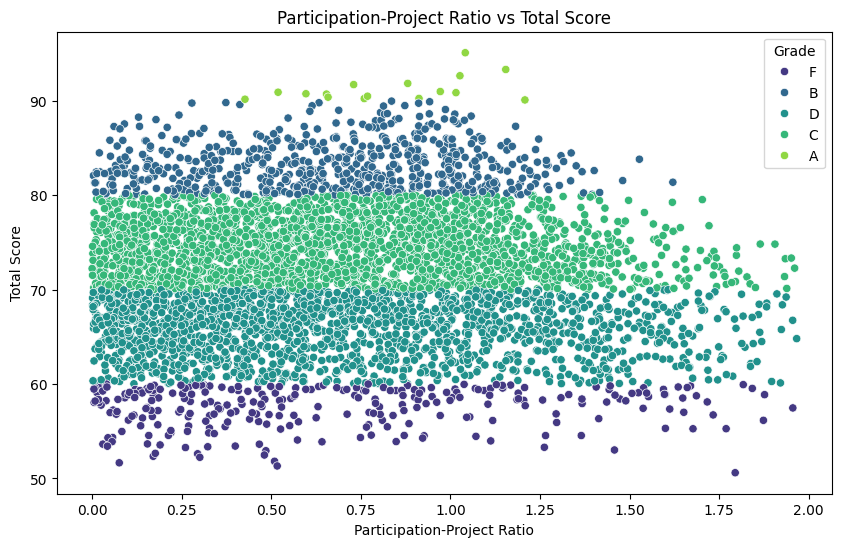

In [360]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Participation_Project_Ratio', y='Total_Score', data=df_fe, hue='Grade', palette='viridis')
plt.title('Participation-Project Ratio vs Total Score')
plt.xlabel('Participation-Project Ratio')
plt.ylabel('Total Score')
plt.legend(title='Grade')
plt.show()

participation alone isn’t a reliable indicator

In [361]:
grade_participation_project_ratio = df_fe.groupby('Grade')['Participation_Project_Ratio'].mean().sort_values(ascending=False)
grade_participation_project_ratio

Grade
A    0.832725
D    0.707833
C    0.695594
B    0.674316
F    0.672813
Name: Participation_Project_Ratio, dtype: float64

top-performing students could be focusing more on projects rather than balancing participation equally.   
On the other hand, C and D students might be relying more on participation to boost their grades.

### 3- Improvement_Score

measure how much a student improved from Midterm_Score to Final_Score:

In [362]:
df_fe['Improvement_Score'] = df_fe['Final_Score'] - df_fe['Midterm_Score']
df_fe['Improvement_Score']

0       19.00
1       16.73
2       22.01
3       -1.21
4        8.64
        ...  
4995    -0.23
4996   -31.25
4997    14.99
4998     2.01
4999    -4.87
Name: Improvement_Score, Length: 5000, dtype: float64

/tmp/ipython-input-579904541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Improvement_Category', data=df_fe, palette='viridis')


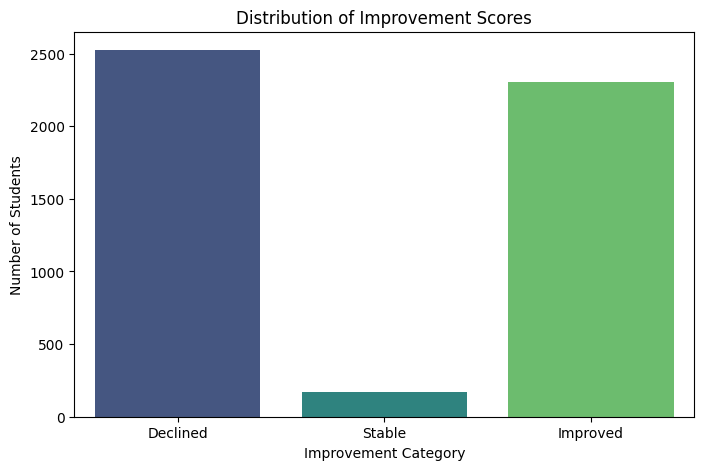

In [363]:
df_fe['Improvement_Category'] = pd.cut(df_fe['Improvement_Score'],
                                        bins=[-float('inf'), -1, 1, float('inf')],
                                        labels=['Declined', 'Stable', 'Improved'])

plt.figure(figsize=(8, 5))
sns.countplot(x='Improvement_Category', data=df_fe, palette='viridis')
plt.title('Distribution of Improvement Scores')
plt.xlabel('Improvement Category')
plt.ylabel('Number of Students')
plt.show()

Some students showed significant improvement, while others declined.

### 4-Weighted Score

Combine different scores with weights to reflect their importance

In [364]:
df_fe['Weighted_Score'] = (df_fe['Midterm_Score'] * 0.3 +
                           df_fe['Final_Score'] * 0.4 +
                           df_fe['Assignments_Avg'] * 0.1 +
                           df_fe['Quizzes_Avg'] * 0.1 +
                           df_fe['Projects_Score'] * 0.1)
df_fe['Weighted_Score']


0       54.997
1       73.850
2       60.799
3       50.456
4       64.554
         ...  
4995    52.742
4996    62.187
4997    68.069
4998    61.560
4999    85.206
Name: Weighted_Score, Length: 5000, dtype: float64

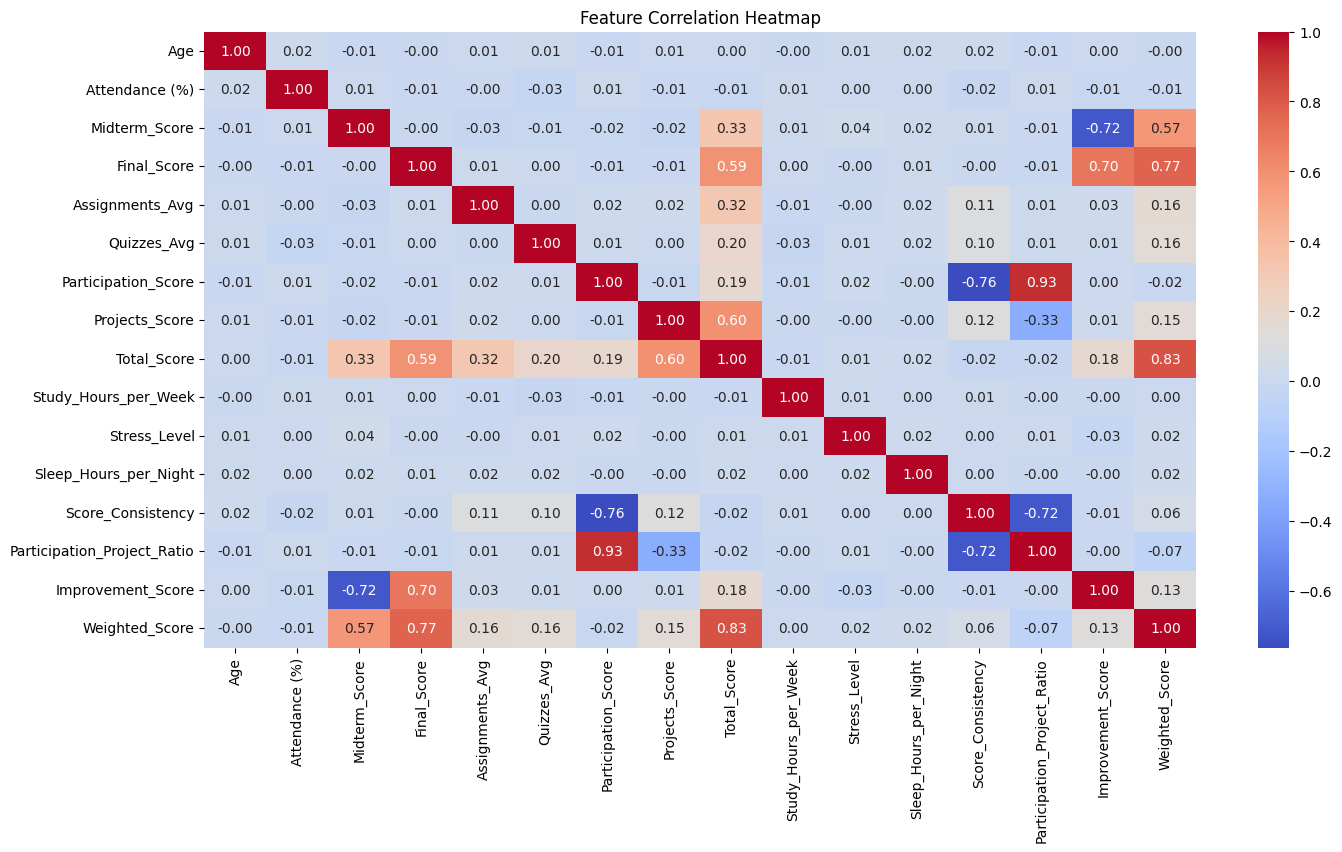

In [365]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_fe.corr(numeric_only=True), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

from that : students with consistent scores across all components tend to have higher weighted scores.

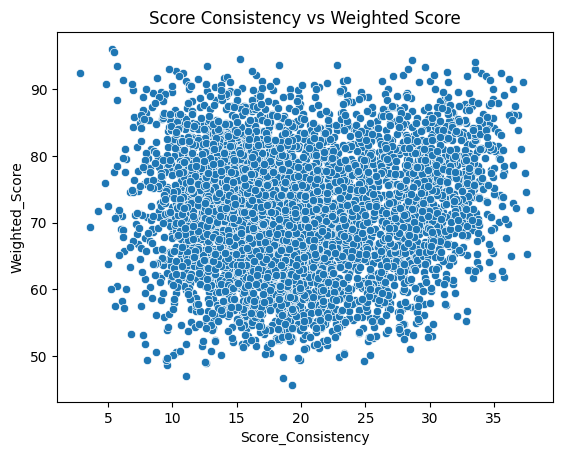

In [366]:
sns.scatterplot(data=df_fe, x='Score_Consistency', y='Weighted_Score')
plt.title('Score Consistency vs Weighted Score')
plt.show()

Students with consistent scores across all components tend to have higher weighted scores.  
Consistent performers generally achieve higher final scores.

/tmp/ipython-input-926940.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_bins_scores = df_fe.groupby('Study_Hours_Bins')['Weighted_Score'].mean().reset_index()


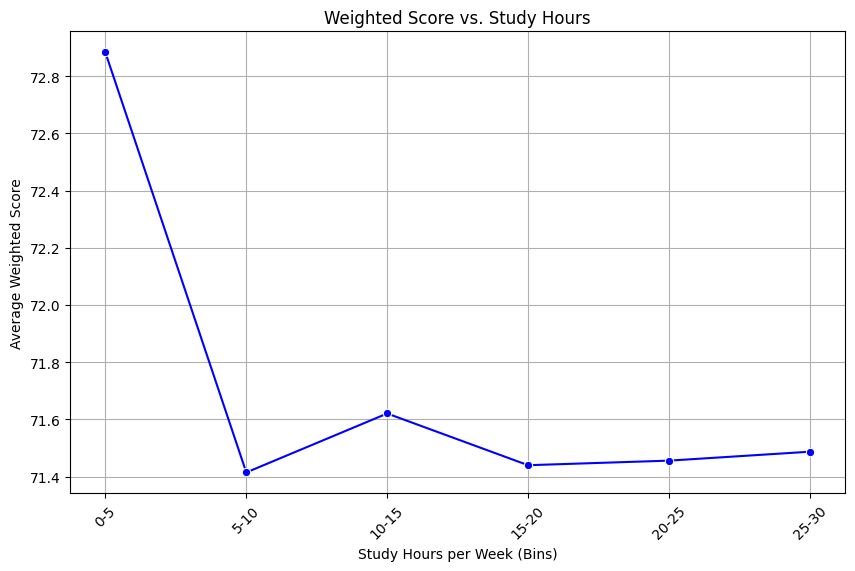

In [367]:
bins = [0, 5, 10, 15, 20, 25, 30, 100]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# Create a new column with study hour bins
df_fe['Study_Hours_Bins'] = pd.cut(df_fe['Study_Hours_per_Week'], bins=bins, labels=labels)

# Calculate the average Weighted_Score for each bin
study_bins_scores = df_fe.groupby('Study_Hours_Bins')['Weighted_Score'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=study_bins_scores, x='Study_Hours_Bins', y='Weighted_Score', marker='o', color='b')
plt.title('Weighted Score vs. Study Hours')
plt.xlabel('Study Hours per Week (Bins)')
plt.ylabel('Average Weighted Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


suggesting that around 20–25 hours per week might be good for maximizing performance.

### Stress-to-Sleep Ratio

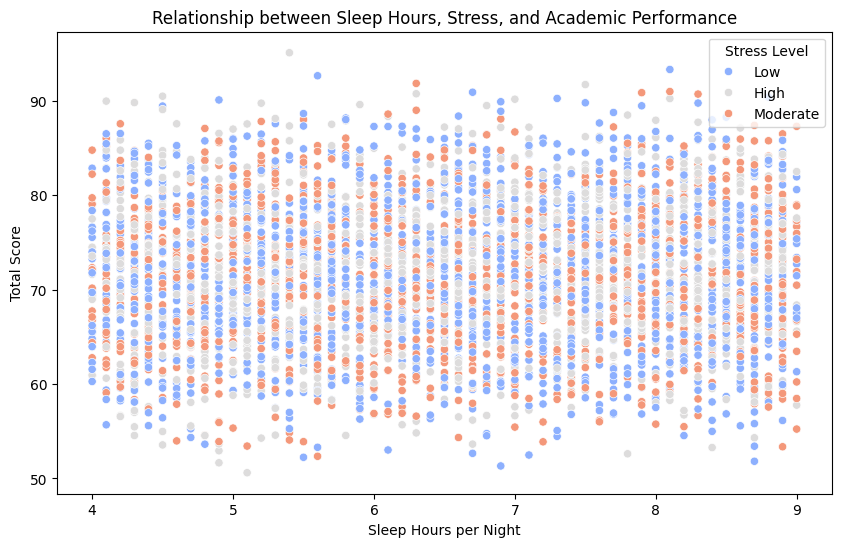

In [368]:
# Feature Engineering: Create stress-to-sleep ratio and categorize stress levels
df_fe['Stress_to_Sleep_Ratio'] = df['Stress_Level'] / df['Sleep_Hours_per_Night']

# Categorize stress levels into 'Low', 'Moderate', and 'High'
def categorize_stress(stress):
    if stress <= 4:
        return 'Low'
    elif stress <= 7:
        return 'Moderate'
    else:
        return 'High'

df_fe['Stress_Category'] = df['Stress_Level'].apply(categorize_stress)

# Visualizing Sleep Hours vs. Total Score by Stress Levels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Sleep_Hours_per_Night',
    y='Total_Score',
    hue='Stress_Category',
    data=df_fe,
    palette='coolwarm'
)
plt.title('Relationship between Sleep Hours, Stress, and Academic Performance')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Total Score')
plt.legend(title='Stress Level')
plt.show()


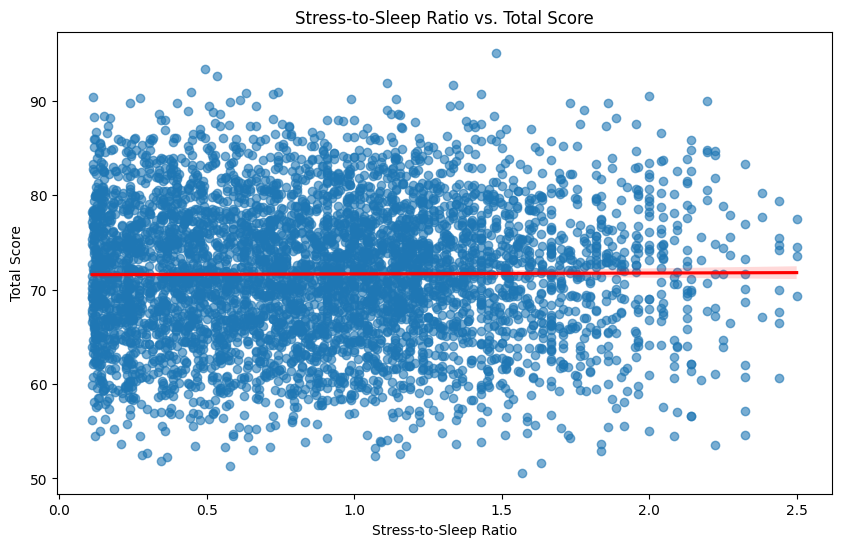

In [369]:

# Stress-to-Sleep Ratio vs. Total Score
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Stress_to_Sleep_Ratio',
    y='Total_Score',
    data=df_fe,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)
plt.title('Stress-to-Sleep Ratio vs. Total Score')
plt.xlabel('Stress-to-Sleep Ratio')
plt.ylabel('Total Score')
plt.show()


Sleep alone doesn’t determine scores. High stress leads to more varied performance. Balanced stress and sleep may help.

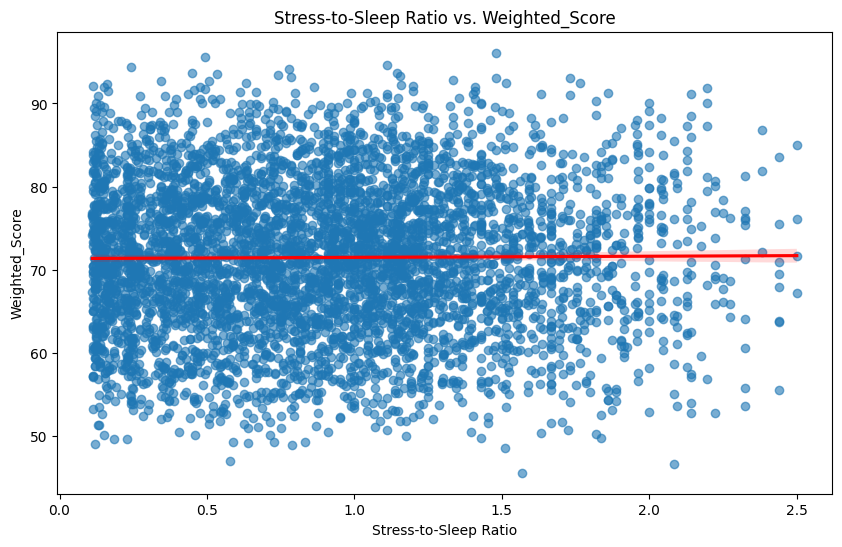

In [370]:
# Stress-to-Sleep Ratio vs. Weighted_Score

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Stress_to_Sleep_Ratio',
    y='Weighted_Score',
    data=df_fe,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)
plt.title('Stress-to-Sleep Ratio vs. Weighted_Score')
plt.xlabel('Stress-to-Sleep Ratio')
plt.ylabel('Weighted_Score')
plt.show()


Stress-to-Sleep Ratio does not appear to have a significant impact on student performance in this dataset.



In exploring what truly shapes student performance, we uncovered a nuanced story — one where grades are influenced by more than just hours spent studying or participating in class.

We started by examining score consistency — the stability of student performance across midterms, finals, assignments, quizzes, and projects. Interestingly, while steady performers often secured higher weighted scores, there were outliers — students whose grades fluctuated wildly yet still achieved impressive totals. This suggested that consistency might help, but it isn’t the sole predictor of success.

Diving deeper, we explored the balance between participation and project work. A striking pattern emerged: top-performing students tended to invest more effort into projects, while C and D students appeared to rely more on participation to lift their grades. It hinted that excelling academically might stem from hands-on, project-based learning rather than simply engaging in class discussions.

The role of study hours added another layer to the story. When we grouped students by weekly study time, an interesting trend surfaced — those dedicating around 20 to 25 hours per week consistently scored higher. Studying more didn’t always equate to better grades; beyond a certain point, the extra effort seemed to hit diminishing returns.

We also explored the complex relationship between stress and sleep. Though we expected high stress to drag scores down, the Stress-to-Sleep Ratio didn’t show a clear impact on performance. This hinted at hidden factors — perhaps strong coping strategies or support systems — that helped some students manage stress without sacrificing their grades.

Finally, we looked at parental education and its effect on academic outcomes. Surprisingly, students’ grades didn’t vary drastically by their parents’ education levels — a reminder that while family background matters, it doesn’t solely dictate success.

What emerged from all these insights is a powerful conclusion: student performance isn’t defined by a single factor. It’s a web of interactions — steady effort, strategic focus on projects, balanced study routines, and resilience in the face of stress. The top scorers seem to master not just their subjects but also the art of managing time and priorities.

Ultimately, success isn’t about working the hardest — it’s about working the smartest.